In [2]:
from scipy import io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [3]:
head1 = io.loadmat('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/NeuroPAL_data/WholeBrain_Ca_Activity/YoungAdults/Head_Activity_OH16230.mat')
# 21 Heads, healthier than other strain 

tail1 = io.loadmat('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/NeuroPAL_data/WholeBrain_Ca_Activity/YoungAdults/Tail_Activity_OH16230.mat')
# 21 Tails

#print(head1.keys())
# print(len(head1['traces'][1][0][:]))
print(head1['stims'], len(head1['traces']))

[[2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [2 1 3]
 [1 3 2]
 [1 3 2]
 [2 1 3]] 109


In [4]:
# Here I want to pull out ASJ left and right
def LR_Traces(file, neuron_search, left_or_right): 
    
    neuron_number = [] #make empty list to save to first
    
    for i in range(0, len(file['neurons'])): #search for list of neuron names, for head1 it's 109 names
        if neuron_search in file['neurons'][i]:
            neuron_number = i #output the index number, i, of the neuron name that matches the search
    
    if not neuron_number: #a boolean, if neuron_number is empty, it will throw an error
        print("Error: Neuron being searched is not in file") 
    
    traces = file['traces'][neuron_number][0][0] #this is just to pull out the traces/data

    LeftNeuron_list = []
    RightNeuron_list = []
    nansNeuron_list = []

    is_L = file['is_L'][neuron_number][0][0] #this is to find if the neuron is Left or Right

    for i in range(0,len(is_L)): #loop through the L/R list, which is either 1, 0, or nans if there's no L/R neuron
        if is_L[i] == 1: # 1 = Left neuron
            LeftNeuron_list.append(traces[i][0][4:-1]) #exclude nans which are in the beginning (4 nans) and 1 nan at the end
        if is_L[i] == 0: # 0 = Right neuron
            RightNeuron_list.append(traces[i][0][4:-1])
        if np.isnan(is_L[i]): #nans = no Left or Right
            nansNeuron_list.append(traces[i][0][4:-1])
        #Notice that here the 'i' value represents the values in the is_L file, meaning that it's looping through 
        # either 42 ors 21 numbers. That means that the corresponding traces[i] value will match the 42/21 trials
        # for that neuron.
    
    if left_or_right == 'left': #Here you can choose which side neuron you want
        return LeftNeuron_list
    if left_or_right == 'right':
        return RightNeuron_list
    if left_or_right == 'neither': #if you know ahead of time that it only has one side, choose 'neither'
        return nansNeuron_list
    
ASJ_L = LR_Traces(head1, 'ASJ', 'left') #here I want to separate ASJ L and R, and I already know they're in the head
ASJ_R = LR_Traces(head1, 'ASJ', 'right')

print(len(ASJ_L[0]))
print(len(ASJ_L))

955
21


In [5]:
## WHEN  RUNNING KERNEL WITH OLD NUMPY ###
def Neurons_list(heads_or_tails, names_or_traces): #this will make a master list of the neuron names and their traces
    if heads_or_tails == 'heads': #you can choose which dataset you want, heads or tails
        data_file = head1
    if heads_or_tails == 'tails':
        data_file = tail1
        
    names_temp = [] 
    traces_temp = []

    for i in range(len(data_file['neurons'])): 

        name = data_file['neurons'][i][0][0] #the files are in dictionary format, so you have to index, and then extract the first value of the nested list
        trace = data_file['traces'][i][0][0] 
        is_L = data_file['is_L'][i][0][0] 

        for j in range(0,len(is_L)):  
            if is_L[j] == 1: # 1 = Left neuron
                names_temp.append(name + '_L') #here you can add the letter 'L' to the end of the name
                traces_temp.append(trace[j][0][4:-1]) #exclude nans, which are 4 nans in beginning, 1 nan at end
                #print(len(trace[i][0][4:-1]))

            if is_L[j] == 0: # 0 = Right neuron
                names_temp.append(name + '_R')
                traces_temp.append(trace[j][0][4:-1])
            if np.isnan(is_L[j]): # nans = no left or right neuron
                names_temp.append(name) 
                traces_temp.append(trace[j][0][4:-1])

    names = [] #want to remove the duplicates
    for i in names_temp: # the names_temp basically looks like 'neuronL','neuronL','neuronL', etc and 'neuronR','neuronR'
        if i not in names: 
            names.append(i) #saving unique names to list 'names' from list 'names_temp'

    traces = np.reshape(traces_temp,(len(names), 21))
    # reshape is a function to basically take a big array and tell the dimensions that you want to reshape to
    # because the length of the names corresponds to how many traces SETS we have, we can use that variable as a number
    # and we already know that one SET has 21 
    
    if names_or_traces == 'names': #here you can choose whether you want the list of names or the traces data
        return names
    if names_or_traces == 'traces':
        return traces

head_names = Neurons_list('heads', 'names')
head_traces = Neurons_list('heads', 'traces')

tail_names = Neurons_list('tails', 'names')
tail_traces = Neurons_list('tails', 'traces')

print(len(head_traces))
print(len(head_traces[0]))
print(head_traces[0])
print(len(head_traces[0][5]))


#print(head_traces[0]) 

#print(len(tail_traces))
#print(len(tail_traces[0]))
#print(type(tail_traces[0]))

189
21
[array([ 1.82573985e-01,  2.24443082e-02, -2.41969430e-02,  7.78534599e-02,
        -2.13752063e-02, -2.99994323e-02, -3.39300043e-02, -7.30530932e-02,
         1.11121350e-02,  3.41484514e-02, -1.27338563e-01, -1.54904477e-01,
        -7.96019527e-02, -2.79733385e-01, -6.22447517e-02, -2.15895463e-01,
        -2.37725749e-01, -1.73995758e-01, -1.87504958e-01, -2.01001889e-01,
        -1.76046932e-01, -1.94673843e-01, -1.06700984e-01, -1.78101781e-01,
        -2.33276920e-01, -2.33106269e-01, -1.96671955e-01, -2.24335610e-01,
        -1.60516357e-01, -2.64131889e-01, -1.13201249e-01, -1.67541894e-01,
        -1.06287049e-01, -7.51191586e-02, -7.82364624e-02, -2.89781840e-02,
        -1.84360834e-01, -1.05954287e-01, -1.40035225e-02, -5.73661797e-02,
        -2.01032575e-01, -1.44410113e-01, -2.07318012e-01, -1.38826722e-01,
        -9.70536084e-02, -2.31980234e-01, -1.50852102e-01, -9.10458134e-02,
        -1.60322940e-01, -1.89488985e-01, -2.85954497e-02, -1.52787398e-01,
     

/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [6]:
### WHEN RUNNING WITH NEW NUMPY KERNEL ###
# def Neurons_list(heads_or_tails, names_or_traces): #this will make a master list of the neuron names and their traces
#     if heads_or_tails == 'heads': #you can choose which dataset you want, heads or tails
#         data_file = head1
#     if heads_or_tails == 'tails':
#         data_file = tail1
        
#     names_temp = [] 
#     traces_temp = []

#     for i in range(len(data_file['neurons'])): 

#         name = data_file['neurons'][i][0][0] #the files are in dictionary format, so you have to index, and then extract the first value of the nested list
#         trace = data_file['traces'][i][0][0] 
#         is_L = data_file['is_L'][i][0][0] 

#         for j in range(0,len(is_L)):  
#             traces_temptemp = trace[j][0][4:-1]
#             diff = 955 - len(traces_temptemp)
#             if is_L[j] == 1: # 1 = Left neuron
#                 names_temp.append(name + '_L') #here you can add the letter 'L' to the end of the name
#                 traces_temptemp = np.append(traces_temptemp, [np.nan]*diff ) #exclude nans, which are 4 nans in beginning, 1 nan at end
#                 traces_temp.append(traces_temptemp) 

#             if is_L[j] == 0: # 0 = Right neuron
#                 names_temp.append(name + '_R')
#                 traces_temptemp = np.append(traces_temptemp, [np.nan]*diff ) #exclude nans, which are 4 nans in beginning, 1 nan at end
#                 traces_temp.append(traces_temptemp) 

#             if np.isnan(is_L[j]): # nans = no left or right neuron
#                 names_temp.append(name) 
#                 traces_temptemp = np.append(traces_temptemp, [np.nan]*diff ) #exclude nans, which are 4 nans in beginning, 1 nan at end
#                 traces_temp.append(traces_temptemp) 


#     names = [] #want to remove the duplicates
#     for i in names_temp: # the names_temp basically looks like 'neuronL','neuronL','neuronL', etc and 'neuronR','neuronR'
#         if i not in names: 
#             names.append(i) #saving unique names to list 'names' from list 'names_temp'

    
#     traces = np.reshape(traces_temp,(len(names), 21, 955))
#     # reshape is a function to basically take aS big array and tell the dimensions that you want to reshape to
#     # because the length of the names corresponds to how many traces SETS we have, we can use that variable as a number
#     # and we already know that one SET has 21 
    
#     if names_or_traces == 'names': #here you can choose whether you want the list of names or the traces data
#         return names
#     if names_or_traces == 'traces':
#         return traces

# head_names = Neurons_list('heads', 'names')
# head_traces = Neurons_list('heads', 'traces')

# tail_names = Neurons_list('tails', 'names')
# tail_traces = Neurons_list('tails', 'traces')

# print(head_names)
# print(len(head_traces))
# #print(head_traces[0]) 

# print(tail_names)
# print(len(tail_traces))
# print(tail_traces[0])
# print(type(tail_traces[0]))

In [7]:
## Correlate ASJ with all neurons
def Correlate(neuron1, ASJ_neuron): #neuron 1 is the list of neurons, ASJ_neuron is ASJ L or R

    correlations = np.empty((len(neuron1), 21)) #make an empty array with the same number of rows as there are neurons (189 for head, 42 for tail), and 21 traces
    
    correlations[:] = np.nan #fill with nans

    for i in range(0,len(neuron1)): #loop through each neuron
        for j in range(0, 21): #loop through each of the 21 trials
            try: #using try, except, and continue together is useful because if something doesn't work, it will skip instead of 'breaking' the loop 
                length = len(neuron1[i][j]) 
                corr = np.corrcoef(neuron1[i][j][:length], ASJ_neuron[j][:length]) #setting so the length of the neuron trace is the same for both #np.corrcoef uses the Pearson correlation coefficient test
                correlations[i][j] = corr[0][1]
                # now save that value in the correlations list of nans. correlations[i][j] will now correspond with the location
                # of neuron1[i][j]. the corr[0][1] is just a weird part of the corrcoef function - this location
                # just refers to the actual correlation value
            except: 
                continue 
            
    return correlations

corr_head_ASJ_L = Correlate(head_traces, ASJ_L)
corr_head_ASJ_R = Correlate(head_traces, ASJ_R)

corr_tail_ASJ_L = Correlate(tail_traces, ASJ_L)
corr_tail_ASJ_R = Correlate(tail_traces, ASJ_R)

/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [8]:
# I realized that since you want the top 10 hits of ALL neurons (heads and tails), then we should combine everything
# Now we'll just keep the ASJL data and ASJR data separated, but combine heads and tails for each

all_names = head_names+tail_names
all_traces_L = np.concatenate((corr_head_ASJ_L, corr_tail_ASJ_L))
all_traces_R = np.concatenate((corr_head_ASJ_R, corr_tail_ASJ_R))

print(len(corr_head_ASJ_L))
print(len(corr_tail_ASJ_L))
print(len(all_traces_L))

189
42
231


In [9]:
def Ranking(array, names, analysis_variable): 
    ranked = np.zeros((len(names), 21)) #make empty array the length of all neurons (189), by 21 trials
    name = []
    medians = []
    true_medians = []
    ranked_meds = []
    absolute_meds = []

    for i in array: 
        med = np.nanmedian(i) #want the median value of the correlation values because medians will exclude weird outliers
        medians.append(abs(med)) #correlation is correlation, doesn't matter positive or negative
        true_medians.append(med)
        
    reverse_sort = np.sort(medians)[::-1] #sorts highest to highest

    for i in range(0,len(names)): 
        where = np.where(reverse_sort[i] == medians) #find where the value of the reverse_sort ranking matches the values of the medians
        num_where = where[0][0]
        ranked[i] = (array[num_where]) #now I can save the location of the neuron order to 'ranked'
        name.append(names[num_where]) #appending name of indexed neuron
        ranked_meds.append(true_medians[num_where])
        absolute_meds.append(medians[num_where])
        
    if analysis_variable == 'names':
        return name
    if analysis_variable == 'correlations':
        return ranked
    if analysis_variable == 'medians': #this will be ranked based on absolute value, but I don't think you need it anymore
        return absolute_meds
    if analysis_variable == 'true medians': #this is ranking with their true values
        return ranked_meds

rank_ASJ_L = Ranking(all_traces_L, all_names, 'correlations')
#print(rank_ASJ_L)
rank_ASJ_L_names = Ranking(all_traces_L, all_names, 'names')
print(rank_ASJ_L_names)
rank_ASJ_L_meds = Ranking(all_traces_L, all_names, 'true medians')
#print(rank_ASJ_L_names[:10]) #if you want just top 10 hits

rank_ASJ_R = Ranking(all_traces_R, all_names, 'correlations')
rank_ASJ_R_names = Ranking(all_traces_R, all_names, 'names')
rank_ASJ_R_meds = Ranking(all_traces_R, all_names, 'true medians')
print(rank_ASJ_R_names)

['ASJ_L', 'ASJ_R', 'AUA_L', 'AWC_L', 'AIA_R', 'AIZ_L', 'AVD_L', 'SMBV_L', 'RIF_L', 'RIC_R', 'AUA_R', 'ASH_R', 'AWB_R', 'DD1', 'ASH_L', 'SABV_L', 'RMH_L', 'AVL', 'VD1', 'AIY_R', 'SAAD_L', 'AWC_R', 'ADA_L', 'NSM_L', 'ADF_L', 'ALN_R', 'SIAD_R', 'ASK_R', 'SIBD_L', 'CEPD_L', 'AIN_R', 'SMBD_L', 'SABV_R', 'RMD_L', 'SAAD_R', 'RIA_R', 'IL1V_R', 'CEPV_R', 'VA1', 'NSM_R', 'SIAV_L', 'RMF_L', 'RMDD_L', 'M3_L', 'I2_R', 'AIA_L', 'PVC_L', 'AVD_R', 'RMH_R', 'AIM_L', 'M3_R', 'URX_R', 'I3', 'IL2D_L', 'ADE_L', 'AVJ_R', 'AVF_R', 'I5', 'IL1D_R', 'PLN_R', 'AVK_R', 'AIB_L', 'MC_L', 'MI', 'PVR', 'URX_L', 'PVC_R', 'ADL_R', 'AIZ_R', 'ASG_L', 'IL2V_R', 'AIB_R', 'AVE_L', 'PVW_R', 'RMF_R', 'ASK_L', 'AVH_L', 'RIC_L', 'AQR', 'RMDV_R', 'ADF_R', 'AVF_L', 'RIG_L', 'M2_R', 'I2_L', 'PVW_L', 'RMG_L', 'VD11', 'LUA_L', 'OLQD_L', 'RIP_R', 'PVN_L', 'PHC_L', 'LUA_R', 'SAAV_L', 'DVB', 'IL2D_R', 'AIM_R', 'AIN_L', 'MC_R', 'SAAV_R', 'AVJ_L', 'RIM_L', 'AVG', 'IL1V_L', 'ADE_R', 'DB2', 'RIG_R', 'M2_L', 'RIS', 'CEPD_R', 'URAD_L', 'FLP_

In [10]:
# Just the top 10 hits
top10_rank_ASJ_L = rank_ASJ_L[0:12]
#print(top10_rank_ASJ_L)
top10_rank_ASJ_L_names = rank_ASJ_L_names[0:12] 
print(top10_rank_ASJ_L_names)

#I noticed that the top 2 hits are with itself (ASJL and ASJR) lol, so we can use [2:12] instead of [:10]
#BUT if you want to show that the top 2 hits are with itself, then use the [:10], idk if Andrew would want to 
#show that, because it's actually a good control and proof of concept to show that the ranking system works lol :) 

# ------- #
# Okay I plotted the original top10 hits, but I noticed 2 of them were strange for ASJ R dataset
#if you use [2:12] then it's index 0 and 3 that are strange
#if you use [:10] then it would be index 2 and 5
#make sure you match the index below accordingly based on if you use [2:12] or [:10]
# so the new index is going to ignore these 2, but if you want to plot it then you can just use [2:12] or [:10]

top10_rank_ASJ_R = np.concatenate((rank_ASJ_R[:2] , rank_ASJ_R[3:5], rank_ASJ_R[6:14])) #this is for [2:12]
#If you want index for [:10] then it would be [:2] + [3:5] + [6:12]
#print(top10_rank_ASJ_R)

top10_rank_ASJ_R_names = rank_ASJ_R_names[:2] + rank_ASJ_R_names[3:5] + rank_ASJ_R_names[6:14]
print(top10_rank_ASJ_R_names)


['ASJ_L', 'ASJ_R', 'AUA_L', 'AWC_L', 'AIA_R', 'AIZ_L', 'AVD_L', 'SMBV_L', 'RIF_L', 'RIC_R', 'AUA_R', 'ASH_R']
['ASJ_R', 'ASJ_L', 'SIAV_L', 'RMF_L', 'RMH_R', 'AIM_L', 'RMF_R', 'AUA_L', 'SMBV_L', 'ASK_R', 'I2_R', 'AUA_R']


In [11]:
# If you want to know if the neuron is in the head or tail, since we ended up combining everything, we can use this simple code 
location_L = []

for i in top10_rank_ASJ_L_names:
    if i in head_names:
        location_L.append('Head')
    else:
        location_L.append('Tail')
        
print(location_L)

location_R = []

for i in top10_rank_ASJ_R_names:
    if i in head_names:
        location_R.append('Head')
    else:
        location_R.append('Tail')
        
print(location_R)

['Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head']
['Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head']


/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_35416/2586721924.py:13: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=dF_L, palette=colors1, linewidth = 5)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_35416/2586721924.py:13: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=dF_L, palette=colors1, linewidth = 5)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

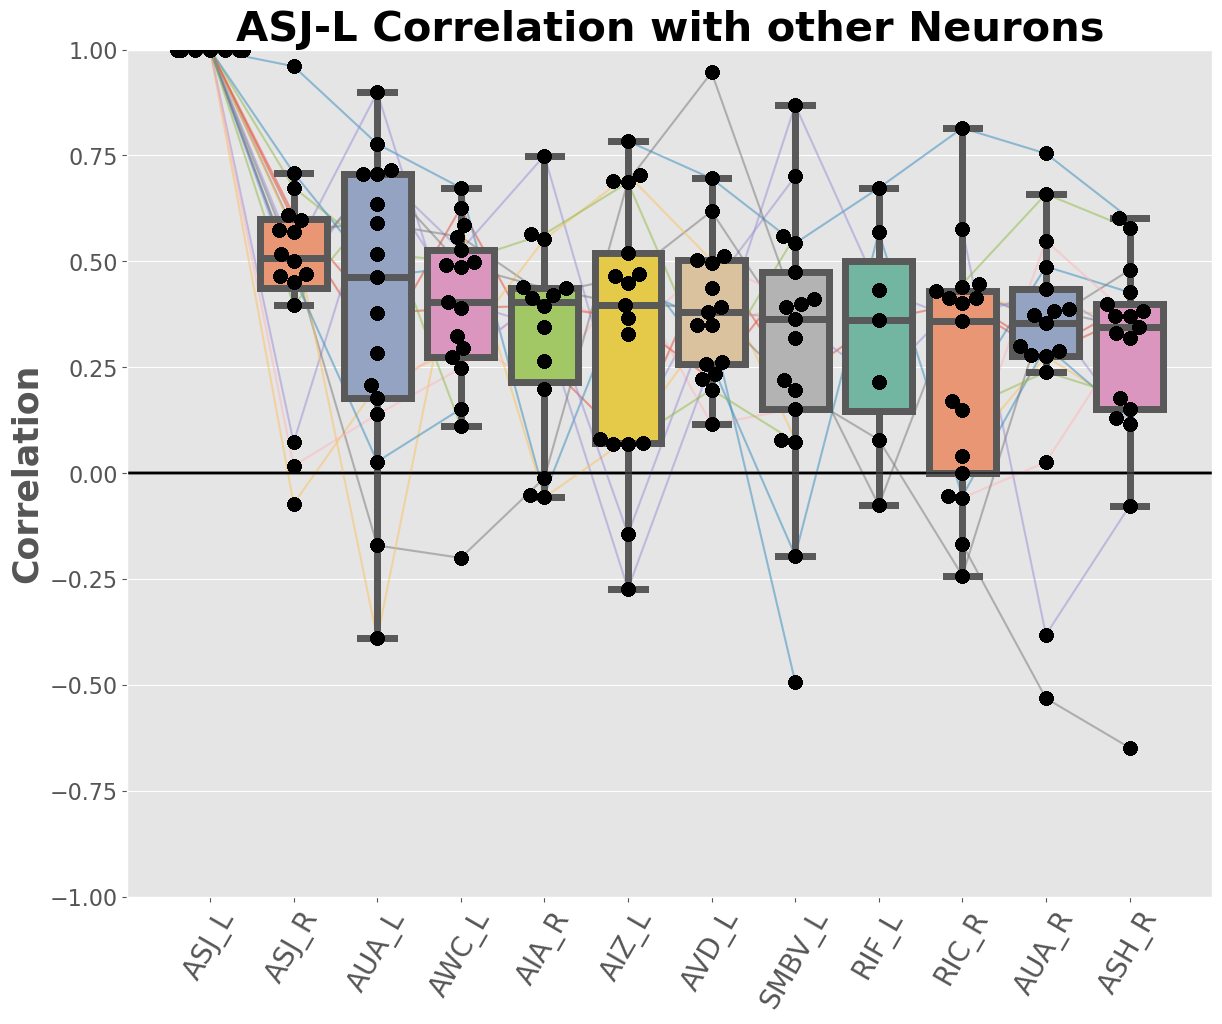

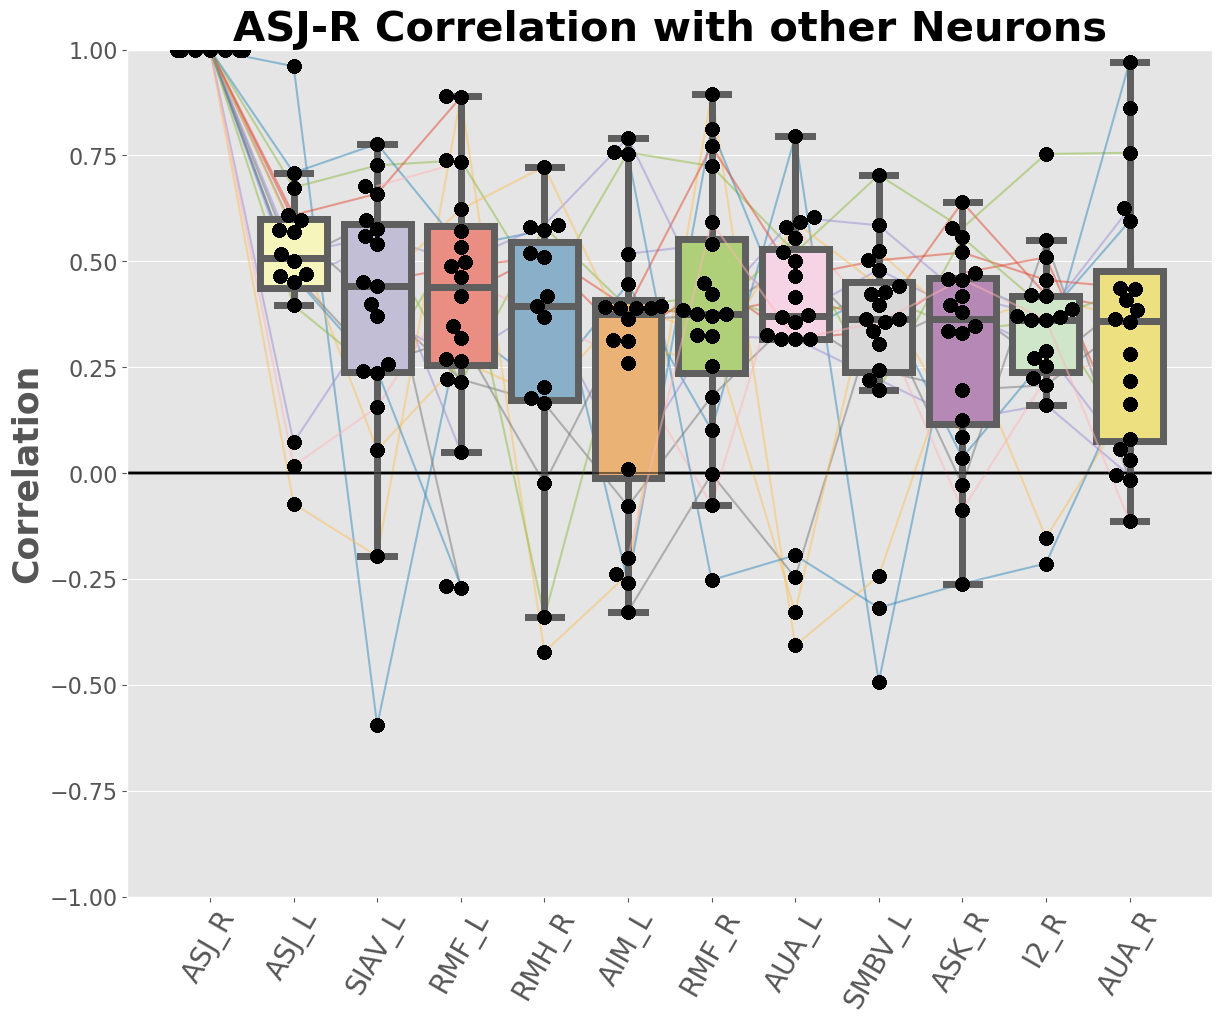

In [11]:
# This is plotting the top 10
dF_L = pd.DataFrame(top10_rank_ASJ_L.T, columns=top10_rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
#print(dF_L)

plt.style.use("ggplot") #to have plot look more like ggplot2 in R
colors1 = sns.color_palette("Set2") #If you look up 'matplotlib colormap reference' you can find a list of options

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w') #this establishes the plotting
for i in top10_rank_ASJ_L.T: #this is for plotting the connecting lines, normally you don't need to loop to plot
    ax.set_title('ASJ-L Correlation with other Neurons', fontsize=30, weight='bold') 
    sns.boxplot(data=dF_L, palette=colors1, linewidth = 5) 
    sns.swarmplot(data=dF_L, size=10, color='black') 
    ax.plot(i, alpha=0.5) #for plotting connecting lines - to look at trends of trials across neurons
    plt.xticks(rotation=60) 
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5) #I drew a black line for number 0 because that shows no correlation
    plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png', dpi = 900)



# Repeat the same things for ASJ R    
dF_R = pd.DataFrame(top10_rank_ASJ_R.T, columns=top10_rank_ASJ_R_names)
#print(dF_R)

plt.style.use("ggplot") #to have plot look more like ggplot2 in R
colors2 = sns.color_palette("Set3")

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
for i in top10_rank_ASJ_R.T:
    ax.set_title('ASJ-R Correlation with other Neurons', fontsize=30, weight='bold')
    sns.boxplot(data=dF_R, palette=colors2, linewidth = 5)
    sns.swarmplot(data=dF_R, size=10, color='black')
    ax.plot(i, alpha=0.5)
    plt.xticks(rotation=60)
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5)
    plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_R_Ranked_Correlations.png', dpi = 900)

/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


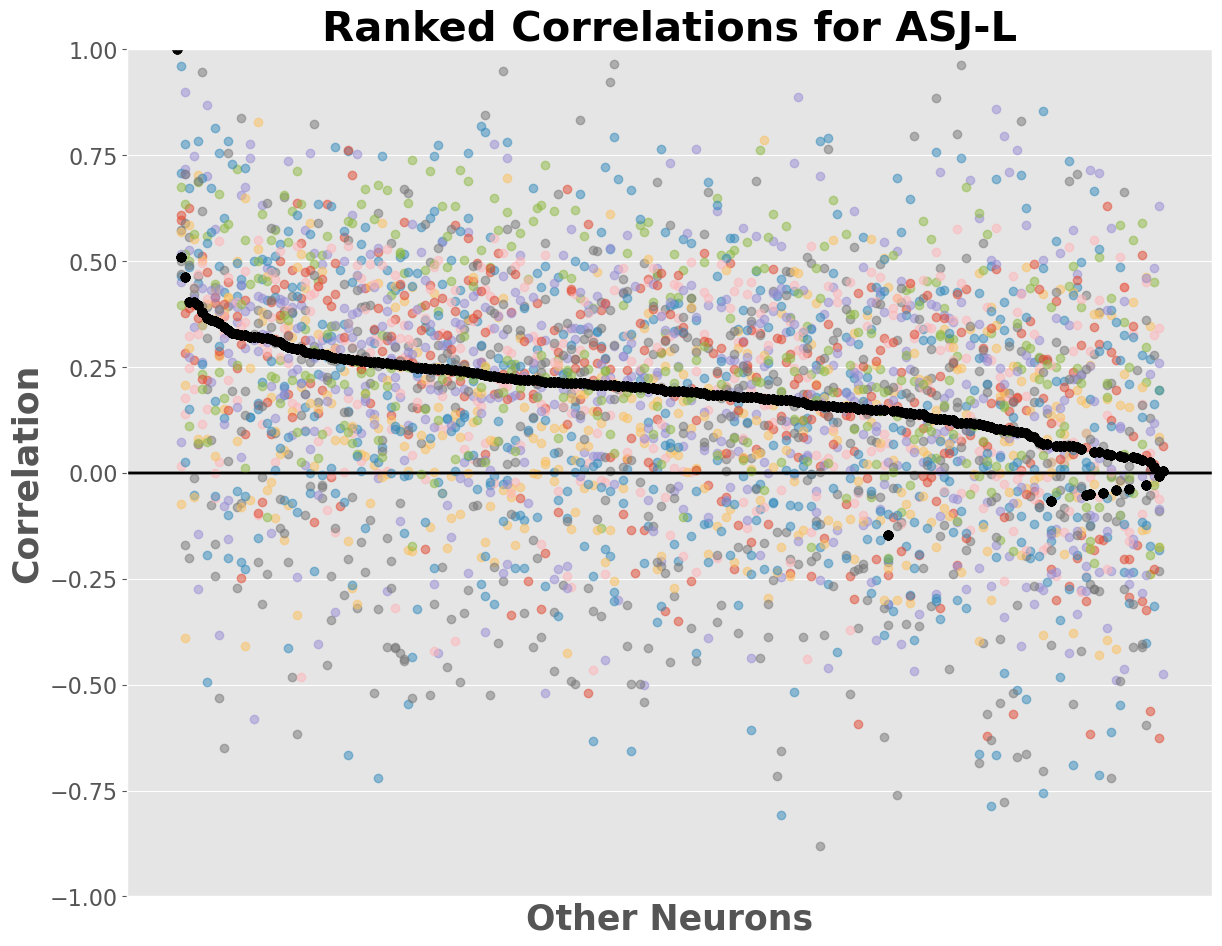

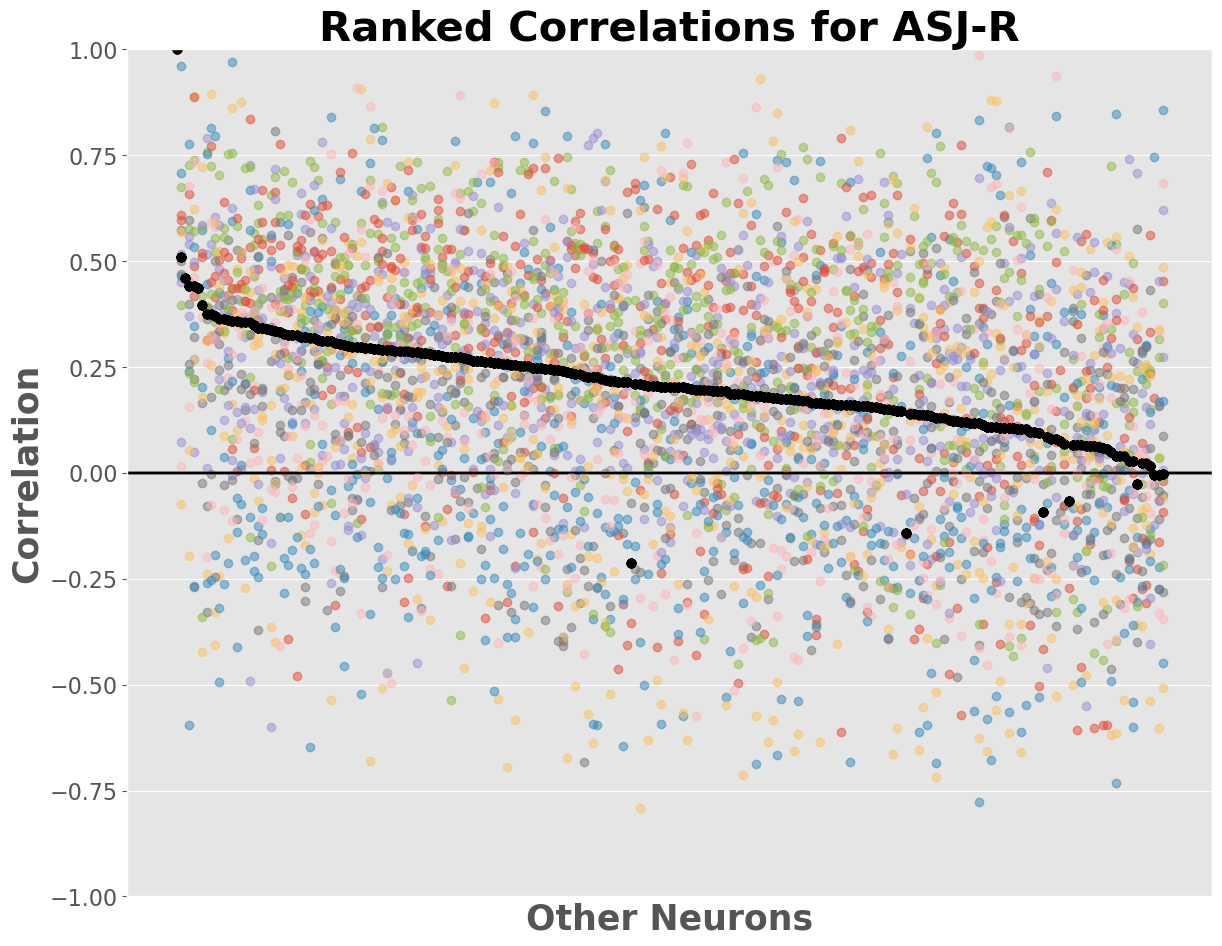

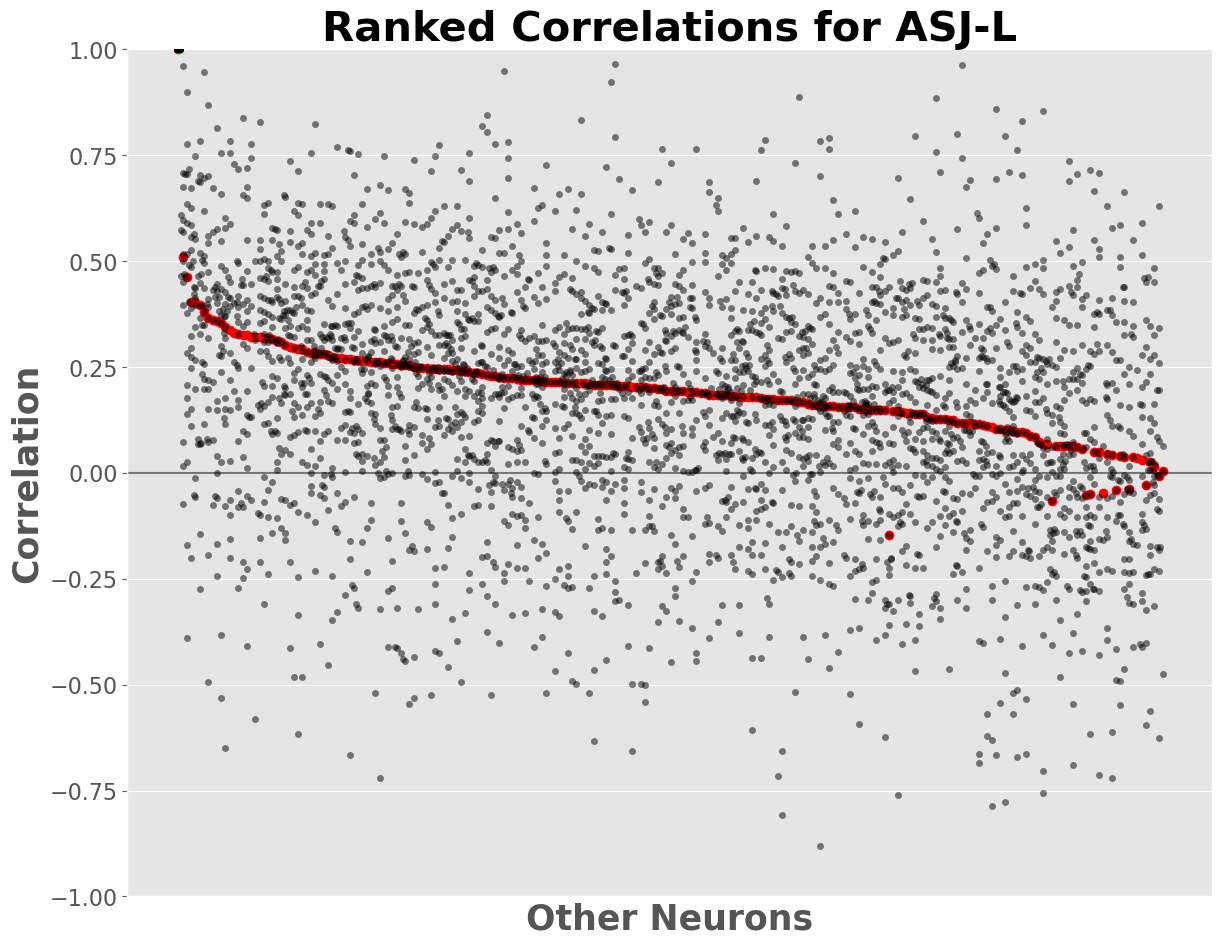

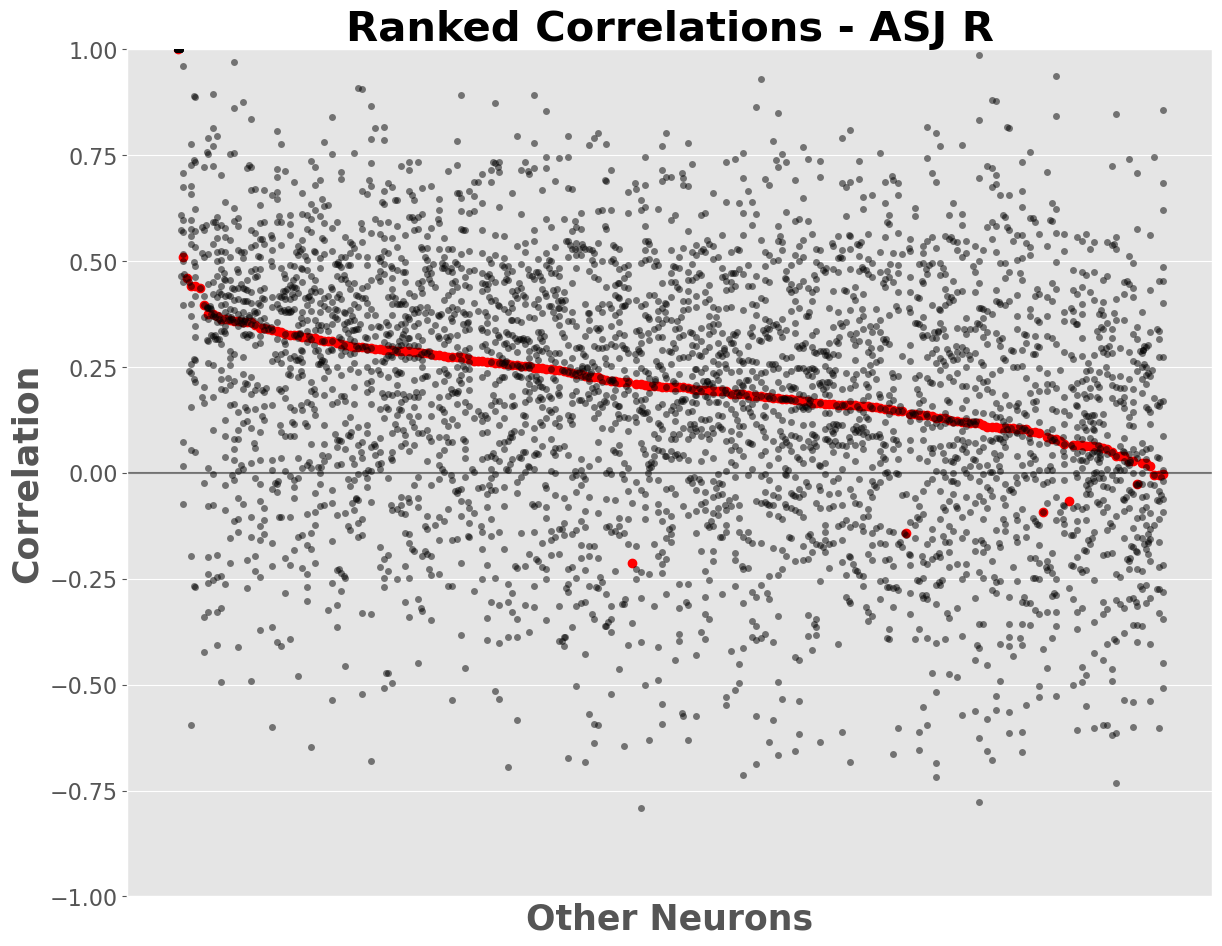

In [12]:
# This is plotting ALL the correlations, and I added the medians as a red color to show
# COLORFUL VERSION
plt.style.use("ggplot") #to have plot look more like ggplot2 in R

count=1
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w') #this establishes the plotting
for i in rank_ASJ_L.T:
    ax.set_title('Ranked Correlations for ASJ-L', fontsize=30, weight='bold') #title
    #sns.swarmplot(data=dF_ALL_L, alpha=0) #plot each individual trial dot using swarmplot
    ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='black') #this is plotting the medians
    ax.plot(rank_ASJ_L_names, i,'o', alpha=0.5, label = count) 
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
    ax.set_xticks([])    
    ax.tick_params(axis= 'y', labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5) 
    count += 1
    #plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png') #here you can save your figure
 
# Repeat the same things for ASJ R    
#print(dF_R)
count=1
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
for i in rank_ASJ_R.T:
    ax.set_title('Ranked Correlations for ASJ-R', fontsize=30, weight='bold')
    ax.plot(rank_ASJ_R_names, i,'o', alpha=0.5, label = count)
    ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='black') #this is plotting the medians
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
    ax.set_xticks([])
    ax.tick_params(axis= 'y', labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5)
    count += 1
    #plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_R_Ranked_Correlations.png')

# This is plotting ALL the correlations, and I added the medians as a red color to show
# BLACK/RED VERSION

dF_ALL_L = pd.DataFrame(rank_ASJ_L.T, columns=rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
#print(dF_L)
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
ax.set_title('Ranked Correlations for ASJ-L', fontsize=30, weight='bold')
sns.swarmplot(data=dF_ALL_L, color='black', alpha=0.5)
ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='red') #this is plotting the medians
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
ax.set_xticks([])
ax.tick_params(axis= 'y', labelsize=16)
ax.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png') #here you can save your figure

# Repeat the same things for ASJ R    
dF_ALL_R = pd.DataFrame(rank_ASJ_R.T, columns=rank_ASJ_R_names)
#print(dF_R)

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
sns.swarmplot(data=dF_ALL_R, color='black', alpha=0.5)
ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='red') #this is plotting the medians
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
ax.set_xticks([])
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_R_Ranked_Correlations.png')
    

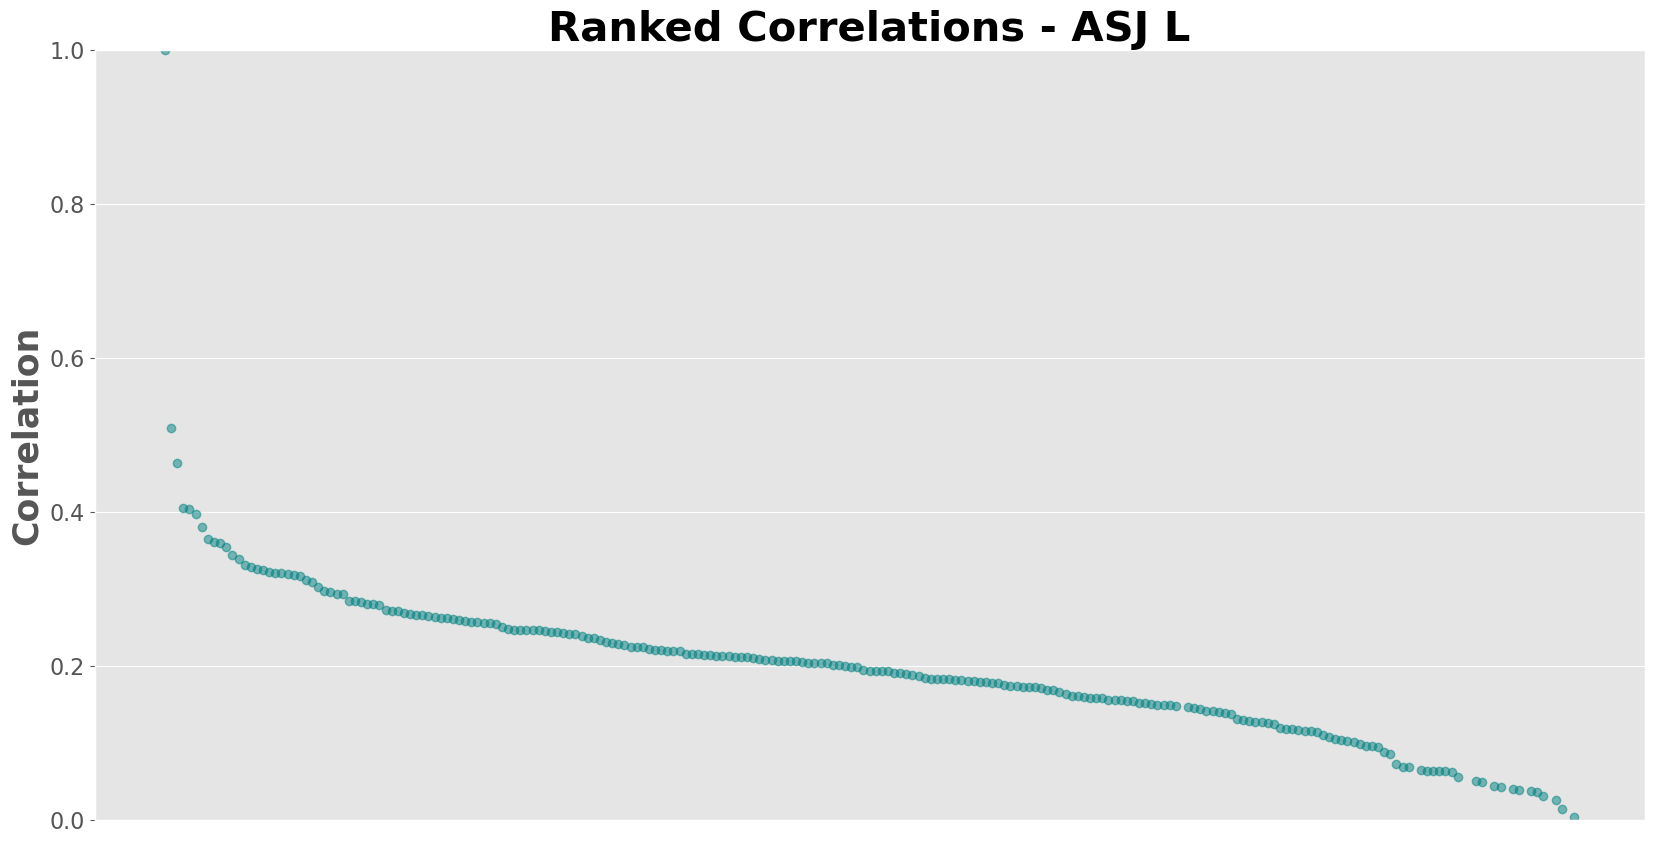

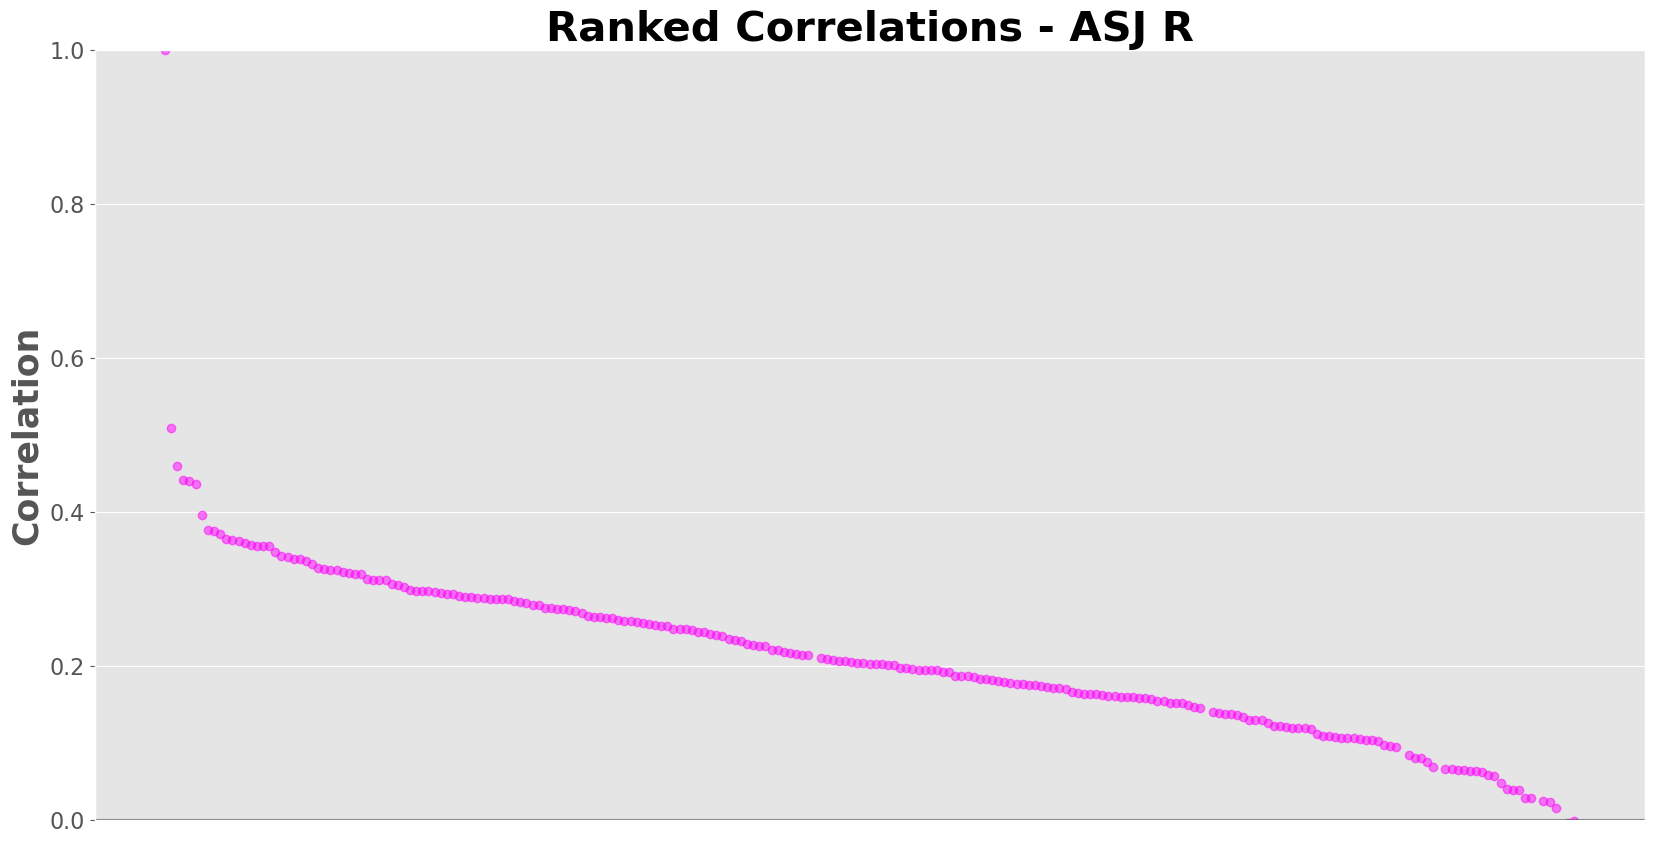

In [13]:
## This is just plotting the absolute value medians ##

fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor='w') #this establishes the plotting
ax.set_title('Ranked Correlations - ASJ L', fontsize=30, weight='bold') #title
ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='teal', alpha=0.5)
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.tick_params(axis= 'y', labelsize=16)
ax.set_xticks([])
ax.set_ylim([0,1])
#plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png') #here you can save your figure

fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor='w')
ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='fuchsia', alpha=0.5)
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.tick_params(axis= 'y', labelsize=16)
ax.set_xticks([])
ax.set_ylim([0,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots//031424_ASJ_R_Ranked_Correlations.png')
    

In [12]:
# Here I wanted to color-code the stimuli that was delivered since it is randomized 
# This will help you organize the data based on stimuli that was delivered

print(head1['stims'])
# 1 = butanone = paleturquoise
# 2 = pentanedoine = pink
# 3 = NaCl = yellow

color1 = []
color2 = []
color3 = []

for i in head1['stims']:
    if i[0] == 1:
        color1.append('paleturquoise')
    if i[0] == 2:
        color1.append('pink')
    if i[0] == 3:
        color1.append('yellow')
        
    if i[1] == 1:
        color2.append('paleturquoise')
    if i[1] == 2:
        color2.append('pink')
    if i[1] == 3:
        color2.append('yellow')
        
    if i[2] == 1:
        color3.append('paleturquoise')
    if i[2] == 2:
        color3.append('pink')
    if i[2] == 3:
        color3.append('yellow')

print(type(head1))

[[2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [2 1 3]
 [1 3 2]
 [1 3 2]
 [2 1 3]]
<class 'dict'>


In [13]:
cmap = plt.get_cmap('nipy_spectral') #this is a colormap, you can look up 'matplotlib colormap reference' to find more, for coloring by trial
count = 0
for i in range(0,21): #21 is because there's 21 trials
    fig, axs = plt.subplots(1,2, figsize=(15,6), facecolor='w')
    ax1 = axs[0]
    ax2 = axs[1]

    ax1.set_title(f"Trial {i+1} ASJ-Left", fontweight="bold") #added one to index as Python indexes at 0
    ax1.plot(ASJ_L[i], color = cmap(i*12))  #to get a wider variety of colors, I multiplied by 12
    ax1.axvspan(242, 282, facecolor=color1[i], alpha = 0.5) #duration of stimulus pulse
    ax1.axvspan(482, 522, facecolor=color2[i], alpha = 0.5) 
    ax1.axvspan(722, 802, facecolor=color3[i], alpha = 0.5)
    ax1.set_xlabel("Frames") #4sec per frame, so 63.66 minutes total recording time 
    ax1.set_ylabel("Fluorescence Intensity (A.U.)")
    
    ax2.set_title(f"Trial {i+1} ASJ-Right", fontweight="bold")
    ax2.plot(ASJ_R[i], color = cmap(i*12))
    ax2.axvspan(242, 282, facecolor=color1[i], alpha = 0.5) 
    ax2.axvspan(482, 522, facecolor=color2[i], alpha = 0.5)
    ax2.axvspan(722, 802, facecolor=color3[i], alpha = 0.5)
    ax2.set_xlabel("Frames")
    ax2.set_ylabel("Fluorescence Intensity (A.U.)")
    count += 1

    plt.close()

In [14]:
# to find out frame times I converted seconds to frames
# second (x) * 4 = frame (y)
# I got the number 4 because it was the frames per second they said
# You can find out frames per second by: mat1['fps']
# This was useful because in mat1['stim_times'] they list what SECOND times they pulsed stimuli
# So I had to figure out what FRAME time I needed to color-code
# For example, 60.5 second stimulus pulse equals 242 frames (see below numbers for ax.axvspan, 242-282)

<font color='lightgreen' size = 10>Lance's Code</font>

In [15]:
#print(len(ASJ_L))
# 21 trials
#print(len(ASJ_L[0]))
# 955 frames per trial
#print(ASJ_L[0][0:242])

# 1 = butanone = paleturquoise
# 2 = pentanedoine = pink
# 3 = NaCl = yellow

In [16]:
### Function to extract all stimuli-specific traces for a specified neuron ###
def NeuronList_stimuli(data, neuron, left_right): 
    
    stimulus_indices = {1: [], 2: [], 3: []}

    for trial_index, trial in enumerate(data['stims']):
        for stimulus_index, stimulus in enumerate(trial):
            stimulus_indices[stimulus].append((trial_index, stimulus_index))

    stimulus_intervals = [(232, 482), (472, 722), (712, 955)]
    neuron_data = {}
    
    if left_right == 'left':
    
        neuron_L = LR_Traces(data, neuron, left_right) 

        neuron_data[f'{neuron}_L_control'] = [traces[:232] for traces in neuron_L]
        
        neuron_data[f'{neuron}_L_butanone'] = []
        neuron_data[f'{neuron}_L_pentanedoine'] = []
        neuron_data[f'{neuron}_L_NaCl'] = []
    
        for stimulus, indices in stimulus_indices.items():
            for trial_index, stimulus_index in indices:
                start, end = stimulus_intervals[stimulus_index]
                if stimulus == 1:
                    neuron_data[f'{neuron}_L_butanone'].append(neuron_L[trial_index][start:end])
                elif stimulus == 2:
                    neuron_data[f'{neuron}_L_pentanedoine'].append(neuron_L[trial_index][start:end])
                elif stimulus == 3:
                    neuron_data[f'{neuron}_L_NaCl'].append(neuron_L[trial_index][start:end])
    
        neuron_data[f'{neuron}_stimuli_list_L'] = [neuron_data[f'{neuron}_L_control'], neuron_data[f'{neuron}_L_butanone'], neuron_data[f'{neuron}_L_pentanedoine'], neuron_data[f'{neuron}_L_NaCl']]
        return neuron_data[f'{neuron}_stimuli_list_L']
    
    if left_right == 'right':
    
        neuron_R = LR_Traces(data, neuron, left_right)

        neuron_data[f'{neuron}_R_control'] = [traces[:232] for traces in neuron_R]
    
        neuron_data[f'{neuron}_R_butanone'] = []
        neuron_data[f'{neuron}_R_pentanedoine'] = []
        neuron_data[f'{neuron}_R_NaCl'] = []

        for stimulus, indices in stimulus_indices.items():
            for trial_index, stimulus_index in indices:
                start, end = stimulus_intervals[stimulus_index]
                if stimulus == 1:
                    neuron_data[f'{neuron}_R_butanone'].append(neuron_R[trial_index][start:end])
                elif stimulus == 2:
                    neuron_data[f'{neuron}_R_pentanedoine'].append(neuron_R[trial_index][start:end])
                elif stimulus == 3:
                    neuron_data[f'{neuron}_R_NaCl'].append(neuron_R[trial_index][start:end])

        neuron_data[f'{neuron}_stimuli_list_R'] = [neuron_data[f'{neuron}_R_control'], neuron_data[f'{neuron}_R_butanone'], neuron_data[f'{neuron}_R_pentanedoine'], neuron_data[f'{neuron}_R_NaCl']]
        return neuron_data[f'{neuron}_stimuli_list_R']

ASJ_stimuli_list_L = NeuronList_stimuli(head1, 'ASJ', 'left')
ASJ_stimuli_list_R = NeuronList_stimuli(head1, 'ASJ', 'right')

#print(len(AIA_stimuli_list_L[0:]))
# 4 lists for AIA L
#print(len(AIA_stimuli_list_L[0]))
# 21 trials for control
#print(len(AIA_stimuli_list_L[0][0]))
# 232 frames for control, 

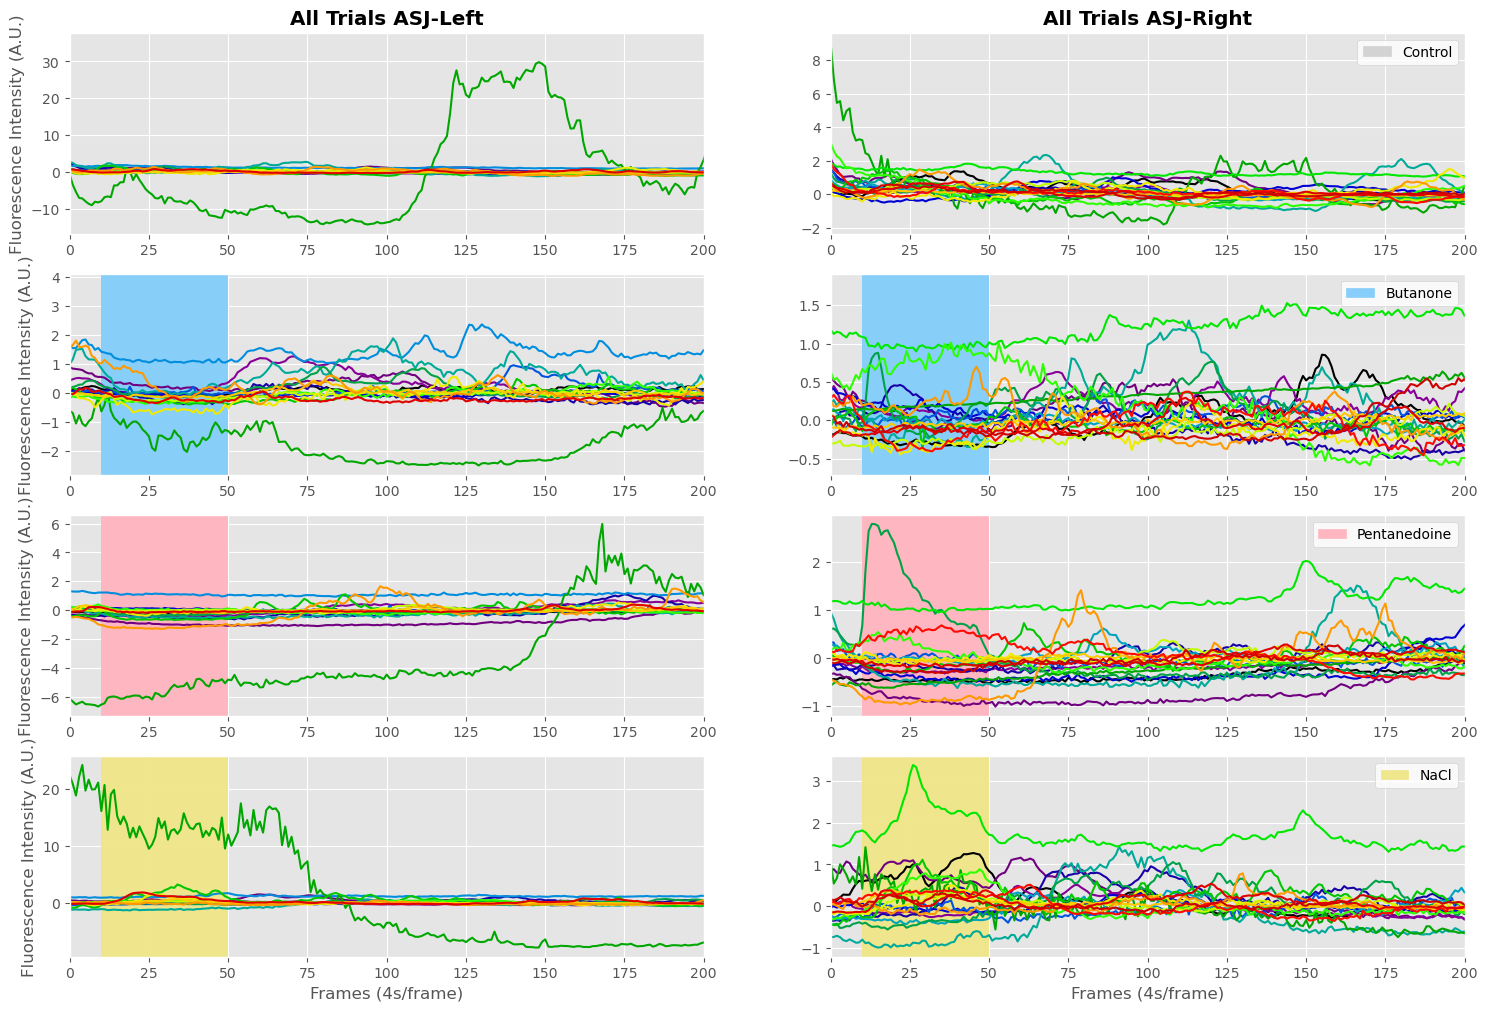

In [17]:
 ### Creating a plotting function to plot by stimuli for a specified neuron ###

def NeuronPlot_stimuli(neuron_stimuli_list_L, neuron_stimuli_list_R, title_L, title_R):    
    
    plt.style.use("ggplot") #to have plot look more like ggplot2 in R

    cmap = plt.get_cmap('nipy_spectral') #this is a colormap, you can look up 'matplotlib colormap reference' to find more, for coloring by trial

    fig, axs = plt.subplots(4,2, figsize=(18,12), facecolor='w')
    ax1 = axs[0,0]
    ax2 = axs[0,1]
    ax3 = axs[1,0]
    ax4 = axs[1,1]
    ax5 = axs[2,0]
    ax6 = axs[2,1]
    ax7 = axs[3,0]
    ax8 = axs[3,1]

    ax1.set_title(f"All Trials {title_L}", fontweight="bold") 
    ax2.set_title(f"All Trials {title_R}", fontweight="bold")

    ax7.set_xlabel("Frames (4s/frame)") 
    ax8.set_xlabel("Frames (4s/frame)")

    ax1.set_ylabel("Fluorescence Intensity (A.U.)")
    ax3.set_ylabel("Fluorescence Intensity (A.U.)")
    ax5.set_ylabel("Fluorescence Intensity (A.U.)")
    ax7.set_ylabel("Fluorescence Intensity (A.U.)")

    for i in range(0,21): 
        ax1.plot(neuron_stimuli_list_L[0][i], color = cmap(i*12))
        ax1.set_xlim(0, 200)

        ax2.plot(neuron_stimuli_list_R[0][i], color = cmap(i*12))
        ax2.set_xlim(0, 200)
        
        ax3.plot(neuron_stimuli_list_L[1][i], color = cmap(i*12)) 
        ax3.axvspan(10, 50, facecolor='lightskyblue', alpha = 0.5) 
        ax3.set_xlim(0, 200)

        ax4.plot(neuron_stimuli_list_R[1][i], color = cmap(i*12))
        ax4.axvspan(10, 50, facecolor='lightskyblue', alpha = 0.5) 
        ax4.set_xlim(0, 200)
        
        ax5.plot(neuron_stimuli_list_L[2][i], color = cmap(i*12))
        ax5.axvspan(10, 50, facecolor='lightpink', alpha = 0.5) 
        ax5.set_xlim(0, 200)

        ax6.plot(neuron_stimuli_list_R[2][i], color = cmap(i*12))
        ax6.axvspan(10, 50, facecolor='lightpink', alpha = 0.5)
        ax6.set_xlim(0, 200)

        ax7.plot(neuron_stimuli_list_L[3][i], color = cmap(i*12))
        ax7.axvspan(10, 50, facecolor='khaki', alpha = 0.5)
        ax7.set_xlim(0, 200)

        ax8.plot(neuron_stimuli_list_R[3][i], color = cmap(i*12))
        ax8.axvspan(10, 50, facecolor='khaki', alpha = 0.5)
        ax8.set_xlim(0, 200)

    patch1 = mpatches.Patch(color='lightskyblue', label='Butanone')
    patch2 = mpatches.Patch(color='lightpink', label='Pentanedoine')
    patch3 = mpatches.Patch(color='khaki', label='NaCl')
    patch4 = mpatches.Patch(color='lightgrey', label='Control')

    ax2.legend(handles=[patch4], loc='upper right', facecolor = 'white')
    ax4.legend(handles=[patch1], loc='upper right', facecolor = 'white')
    ax6.legend(handles=[patch2], loc='upper right', facecolor = 'white')
    ax8.legend(handles=[patch3], loc='upper right', facecolor = 'white')

    #plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/ASJ_L_R_ExposureTraces.png', dpi = 900)

    return plt.show()

ASJ_test_plot = NeuronPlot_stimuli(ASJ_stimuli_list_L, ASJ_stimuli_list_R, 'ASJ-Left', 'ASJ-Right')


In [18]:
print(len(head1['neurons']))
print(len(head1['stims']))
print(len(head1['stims'][0]))
print(len(head1['traces'][0][0][0]))   
print(len(head1['is_L'][0][0][0]))
print(len(head1['is_L'][0][0]))
print((head1['is_L'][0][0]))



109
21
3
42
42
1
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]]


In [46]:
## WHEN  RUNNING KERNEL WITH OLD NUMPY ###
def OtherNeurons(heads_or_tails, names_or_tracesStimuli): #this will make a master list of the neuron names and their traces
    if heads_or_tails == 'heads': #you can choose which dataset you want, heads or tails
        data_file = head1
    if heads_or_tails == 'tails':
        data_file = tail1
        
    names_temp = [] 
    traces_temp = []

    for i in range(len(data_file['neurons'])): 

        name = data_file['neurons'][i][0][0] #the files are in dictionary format, so you have to index, and then extract the first value of the nested list
        trace = data_file['traces'][i][0][0] 
        is_L = data_file['is_L'][i][0][0] 

        for j in range(0,len(is_L)):  
            if is_L[j] == 1: # 1 = Left neuron
                names_temp.append(name + '_L') #here you can add the letter 'L' to the end of the name
                traces_temp.append(trace[j][0][4:-1]) #exclude nans, which are 4 nans in beginning, 1 nan at end
                #print(len(trace[i][0][4:-1]))

            if is_L[j] == 0: # 0 = Right neuron
                names_temp.append(name + '_R')
                traces_temp.append(trace[j][0][4:-1])
            if np.isnan(is_L[j]): # nans = no left or right neuron
                names_temp.append(name) 
                traces_temp.append(trace[j][0][4:-1])

    names = [] #want to remove the duplicates
    for i in names_temp: # the names_temp basically looks like 'neuronL','neuronL','neuronL', etc and 'neuronR','neuronR'
        if i not in names: 
            names.append(i) #saving unique names to list 'names' from list 'names_temp'

    traces = np.reshape(traces_temp,(len(names), 21))
    # reshape is a function to basically take a big array and tell the dimensions that you want to reshape to
    # because the length of the names corresponds to how many traces SETS we have, we can use that variable as a number
    # and we already know that one SET has 21 

    #Transpose the traces array so that each row is a trial and each column is a neuron
    traces = np.transpose(traces)
    traces = traces.tolist()

    #Convert stims to a list of lists
    stims = [list(item) for item in head1['stims']]

    #Append stims to the end of each row in traces
    traces = [row + [stim] for row, stim in zip(traces, stims)]

    #Convert traces back to a numpy array
    final = np.array(traces)

    if names_or_tracesStimuli == 'names': #here you can choose whether you want the list of names or the traces data
        return names
    if names_or_tracesStimuli == 'traces_and_stimuli':
        return final

head_names = OtherNeurons('heads', 'names')
head_tracesAndStimuli = OtherNeurons('heads', 'traces_and_stimuli')

tail_names = OtherNeurons('tails', 'names')
tail_tracesAndStimuli = OtherNeurons('tails', 'traces_and_stimuli')

# print(len(head_tracesAndStimuli)) #21 trials, corresponding to the 21 rows
# print(len(head_tracesAndStimuli[0])) #189 neurons per trial, and the list of stimuli for that trial appended at the end, resulting in 190 columns
# print(len(head_tracesAndStimuli[0][0])) #955 frames per neuron trace
print(head_tracesAndStimuli[0][-1]) #the stimuli list is the last column, so you can index it with [i][-1] to get the stimuli for that trial

all_names = head_names+tail_names

[2, 1, 3]


/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_55161/3008673626.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  final = np.array(traces)


In [20]:
# print(len(head_tracesAndStimuli)) #21 trials, corresponding to the 21 rows
# print(len(head_tracesAndStimuli[0])) #189 neurons per trial, and the list of stimuli for that trial appended at the end, resulting in 190 columns
# print(len(head_tracesAndStimuli[0][0])) #955 frames per neuron trace
# print(head_tracesAndStimuli[0][-1]) #the stimuli list is the last column, so you can index it with [i][-1] to get the stimuli for that trial

### EXTRACT STIMULI TRACES FOR ALL NEURONS TO COMPARE ASJ L AND R TO ###
def OTHERNeuronList_stimuli(data): 
    
    stimulus_indices = {1: [], 2: [], 3: []}
    
    #Create a dictionary with the stimulus as the key, and then the trial number and stimulus index as the value
    for trial_index, trial in enumerate(data):
        for stimulus_index, stimulus in enumerate(trial[-1]): #the last column is the stimuli list
            stimulus_indices[stimulus].append((trial_index, stimulus_index))
    #print(stimulus_indices)

    #Initialize the intervals for each stimulus
    stimulus_intervals = [(232, 482), (472, 722), (712, 955)]
    neuron_data = {}
                             
    neuron_data['control'] = [[trace[:232] for trace in trial[:-1]] for trial in data] #outer loop iterates over trials, inner loop iterates over neurons, excluding the last column with  the stimuli list
    neuron_data['butanone'] = []
    neuron_data['pentanedoine'] = []
    neuron_data['NaCl'] = []

    for stimulus, indices in stimulus_indices.items(): #iterates ove the keys=stimuli, and the indices=trial number and stimulus index
        for trial_index, stimulus_index in indices: #unpacks the tuples (indices) into trial number and stimulus index
            start, end = stimulus_intervals[stimulus_index] #extracts the start and end frames based on the stimulus and defined intervales "stimulus_intervals"
            if stimulus == 1:
                neuron_data['butanone'].append([data[trial_index][neuron_index][start:end] for neuron_index in range(len(data[trial_index])-1)]) # "-1" to exclude the last column with the stimuli array
            if stimulus == 2:
                neuron_data['pentanedoine'].append([data[trial_index][neuron_index][start:end] for neuron_index in range(len(data[trial_index])-1)])
            if stimulus == 3:
                neuron_data['NaCl'].append([data[trial_index][neuron_index][start:end] for neuron_index in range(len(data[trial_index])-1)])
    
    #Concatenate all stimuli lists into one nested list
    neuron_data['stimuli_list'] = [neuron_data['control'], neuron_data['butanone'], neuron_data['pentanedoine'], neuron_data['NaCl']]
    return neuron_data['stimuli_list']
    

OTHERneurons_stimuli_Head = OTHERNeuronList_stimuli(head_tracesAndStimuli)
OTHERneurons_stimuli_Tail = OTHERNeuronList_stimuli(tail_tracesAndStimuli)

print(len(OTHERneurons_stimuli_Head)) #4 lists for each stimulus
print(len(OTHERneurons_stimuli_Head[2])) #21 trials for Pentanedoine stimulus
print(len(OTHERneurons_stimuli_Head[2][0])) # 189 - for 189 neurons
print(OTHERneurons_stimuli_Head[2][0][0][0]) # first trace for neuron 1 for trial 1 for Pentanedoine stimulus
print(OTHERneurons_stimuli_Head[0][5][2][0]) # first trace for neuron 3 in trial 6, stimulus control
print(len(OTHERneurons_stimuli_Head[1][0][0])) #250 traces for Butanone stiumulus
print(len(OTHERneurons_stimuli_Head[2][0][0])) #250 traces for Pentanedoine stiumulus
print(len(OTHERneurons_stimuli_Head[3][0][0])) #243 traces for NaCl stiumulus


4
21
189
0.05982659298045991
0.9380538101651813
250
250
243


In [32]:
# print(len(ASJ_stimuli_list_L)) #number of stimuli - 4
# print(len(ASJ_stimuli_list_L[0])) #number of trials - 21
# print(len(ASJ_stimuli_list_L[0][0])) #length of trace - 232 frames

# def NaN_counter(neuron_stimuli_list, head_or_tail):
#     NaN_counts = []
#     for stimuli_index, stimuli in enumerate(neuron_stimuli_list):
#         for trial_index, trial in enumerate(stimuli):
#             NaN_count = sum(np.isnan(neuron).any() for neuron in trial)
#             NaN_counts.append((NaN_count, f'Trial {trial_index+1} of stimuli {stimuli_index+1} in the {head_or_tail} traces'))
#     NaN_counts.sort(reverse=True)
#     return NaN_counts

# NaN_counts_L = NaN_counter(ASJ_stimuli_list_L, 'head')
# NaN_counts_R = NaN_counter(ASJ_stimuli_list_R, 'head')

# print(NaN_counts_L[:4])  #there appears to be no NaN trace values...
# print(NaN_counts_R[:4])  #there appears to be no NaN trace values... 


# print(len(OTHERneurons_stimuli_Head[0][0][55])) # neuron 56 for trial 1 for control stimulus is missing all traces.. .this is why NaN correlation values are being returned


### ADJUST CORRELATION FUNCTION TO BE STIMULI-SPECIFIC ###
def CorrelateAlltoASJ(neurons, ASJ_neuron): #'neuron' is the list of all other neurons, ASJ_neuron is ASJ L or R
    num_stimuli, num_trials, num_neurons = len(neurons), len(neurons[0]), len(neurons[0][0])
    #print(num_stimuli, num_trials, num_neurons)
    correlations = np.full((num_stimuli, num_neurons, num_trials), np.nan)

    # neurons_Nan = []
    # ASJ_Nan = []
    for s in range(num_stimuli): #loop through each stimulus (4)
        for t in range(num_trials): #loop through each of the 21 trials
            for n in range(num_neurons): #loop through each neuron
                try:
                    length = min(len(neurons[s][t][n]), len(ASJ_neuron[s][t])) #find the minimum length of the two traces (s - stimuli, t - trial, n - neuron)
                    # N_nan = np.isnan(neurons[s][t][n][:length]).sum()
                    # A_nan = np.isnan(ASJ_neuron[s][t][:length]).sum()
                    # neurons_Nan.append(N_nan)
                    # ASJ_Nan.append(A_nan)
                    corr = np.corrcoef(neurons[s][t][n][:length], ASJ_neuron[s][t][:length])
                    correlation_value = corr[0][1]
                    
                    # if np.isnan(correlation_value):
                    #     print(f"NaN correlation value detected at stimulus {s}, trial {t}, neuron {n}.")
                    
                    correlations[s][n][t] = corr[0][1]

                except:
                    print(f"Error at stimulus {s}, trial {t}, neuron {n}")
                    # print(f"Neuron trace: {neurons[s][t][n]}")
                    # print(f"ASJ trace: {ASJ_neuron[s][t]}")
                    continue 
    # print(f"Neurons NaN: {np.unique(neurons_Nan, return_counts=True)}") # NO NAN VALUES APPEAR EVER
    # print(f"ASJ NaN: {np.unique(ASJ_Nan, return_counts=True)}") # NO NAN VALUES APPEAR EVER

    return correlations

### Correlating Other Neurons (head) to ASJ L
corr_head_ASJ_L = CorrelateAlltoASJ(OTHERneurons_stimuli_Head, ASJ_stimuli_list_L)
## Correlating Other Neurons (tail) to ASJ L
corr_tail_ASJ_L = CorrelateAlltoASJ(OTHERneurons_stimuli_Tail, ASJ_stimuli_list_L)
### Correlating Other Neurons (head) to ASJ R
corr_head_ASJ_R = CorrelateAlltoASJ(OTHERneurons_stimuli_Head, ASJ_stimuli_list_R)
### Correlating Other Neurons (tail) to ASJ R
corr_tail_ASJ_R = CorrelateAlltoASJ(OTHERneurons_stimuli_Tail, ASJ_stimuli_list_R)


print(len(corr_head_ASJ_L)) # 4 - for each stimuli
print(len(corr_head_ASJ_L[0])) # 189 neurons 
print(len(corr_head_ASJ_L[0][0])) # 21 trials per neuron                
print(corr_head_ASJ_L[0][0][0]) # correlation value for stimulus control, neuron 1 (index is 0), trial 1 (index is 0)

neuron_data = OTHERneurons_stimuli_Head[0][0][0]
ASJ_neuron_data = ASJ_stimuli_list_L[0][0]

# Check for NaN values in the original data
# print(np.isnan(neuron_data).any())  #False....
# print(np.isnan(ASJ_neuron_data).any())  #False....

# print(np.unique(neuron_data).size > 1)  #True....
# print(np.unique(ASJ_neuron_data).size > 1) #True....  

# print(np.std(neuron_data))  # Print the standard deviation of neuron_data
# print(np.std(ASJ_neuron_data))  # Print the standard deviation of ASJ_neuron_data



print(corr_head_ASJ_L[1][10]) # correlation value for stimulus butanone, neuron 11 for all trials
print(np.isnan(corr_head_ASJ_L[1][10]).sum()) # 9 NaN values for stimulus butanone, neuron 11 for all trials

# print(len(corr_tail_ASJ_R)) # 4 - for each stimuli
# print(len(corr_tail_ASJ_R[0])) # 42 neurons 
# print(len(corr_tail_ASJ_R[0][0])) # 21 trials per neuron                
# print(corr_tail_ASJ_R[3][2][0]) # correlation value for stimulus NaCl, neuron 3 (index is 0), trial 1 (index is 0)
# print(corr_tail_ASJ_R[1][10]) # correlation value for stimulus butanone, neuron 11 for all trials


[(0, 'Trial 9 of stimuli 4 in the head traces'), (0, 'Trial 9 of stimuli 3 in the head traces'), (0, 'Trial 9 of stimuli 2 in the head traces'), (0, 'Trial 9 of stimuli 1 in the head traces')]
[(0, 'Trial 9 of stimuli 4 in the head traces'), (0, 'Trial 9 of stimuli 3 in the head traces'), (0, 'Trial 9 of stimuli 2 in the head traces'), (0, 'Trial 9 of stimuli 1 in the head traces')]
0
4
189
21
-0.06665486028546756
[ 0.25052269         nan  0.5828411  -0.43252573 -0.04164201 -0.19941447
 -0.07321845         nan         nan -0.16339486  0.22352578 -0.70617864
         nan  0.45396728         nan         nan -0.20898071 -0.15328683
         nan         nan         nan]
9


In [49]:
def RankingByStimuli(array, names, analysis_variable):
    all_ranked = []
    all_names = []
    all_ranked_meds = []
    all_true_meds = []
    
    # add a counter to count the number of neurons that are missing more than 4 NaN values!!! 
    
    for j in range(len(array)): # Loop over each stimulus
        medians = []
        true_medians = []
        for i in array[j]: # Loop over each neuron for the iterative stimulus
            num_nan = np.isnan(i).sum()
            if num_nan <= 4: # Check if the neuron has more than 4 NaN values
               # print(f"Number of NaN values for neuron: {num_nan}")
                med = np.nanmedian(i) # Calculate the median correlation value for the current neuron across all trials
                medians.append(abs(med))  
                true_medians.append(med) 

        reverse_sort = sorted(medians, reverse=True) # Sort medians in descending order
        ranked = np.empty((len(array[j]), len(array[j][0])), dtype=object) # Initialize ranked array
        name = []
        ranked_meds = []
        absolute_meds = []

        for i in range(len(reverse_sort)): # Loop over sorted medians
            index = medians.index(reverse_sort[i]) # Get index of current median in original medians list
            ranked[i] = array[j][index] # Store neuron's correlation values in ranked array
            name.append(names[index]) # Store neuron's name
            ranked_meds.append(true_medians[index]) # Store neuron's median correlation
            absolute_meds.append(medians[index]) # Store neuron's absolute median correlation

        all_ranked.append(ranked)
        all_names.append(name)
        all_ranked_meds.append(ranked_meds)
        all_true_meds.append(true_medians)

    if analysis_variable == 'names':
        return all_names
    elif analysis_variable == 'correlations':
        return all_ranked
    elif analysis_variable == 'medians':
        return all_ranked_meds
    elif analysis_variable == 'true medians':
        return all_true_meds

corr_all_traces_L = np.concatenate((corr_head_ASJ_L, corr_tail_ASJ_L), axis = 1)
corr_all_traces_R = np.concatenate((corr_head_ASJ_R, corr_tail_ASJ_R), axis = 1)

### Ranking for ASJ L correlations with Other Neurons ###
Ranking_ASJ_L_corr = RankingByStimuli(corr_all_traces_L, all_names, 'correlations')
Ranking_ASJ_L_names = RankingByStimuli(corr_all_traces_L, all_names, 'names')
Ranking_ASJ_L_trueMedians = RankingByStimuli(corr_all_traces_L, all_names, 'true medians')

### Ranking for ASJ R correlations with Other Neurons ###
Ranking_ASJ_R_corr = RankingByStimuli(corr_all_traces_R, all_names, 'correlations')
Ranking_ASJ_R_names = RankingByStimuli(corr_all_traces_R, all_names, 'names')
Ranking_ASJ_R_trueMedians = RankingByStimuli(corr_all_traces_R, all_names, 'true medians')

print(len(Ranking_ASJ_L_corr)) # 4 - for each stimuli
print(len(Ranking_ASJ_L_corr[0])) # 231 neurons
print(len(Ranking_ASJ_L_corr[0][0])) # 21 trials
print(Ranking_ASJ_L_corr[0][0][0:10]) # top 10 highest correlated neurons (values) for control stimulus for first trial
# print(np.isnan(Ranking_ASJ_L_corr[0][0][0:10]).sum())
nan_count = sum(np.isnan(x) for x in Ranking_ASJ_L_corr[0][0][0:10])
print(nan_count)

print(Ranking_ASJ_L_corr[3][5][0:10]) # top 10 highest correlated neurons (values) for NaCl stimulus for 6th trial


print(len(Ranking_ASJ_L_names)) # 4 - for each stimuli
print(len(Ranking_ASJ_L_names[0])) # value is 150.... meaning only 150 neurons have less than 4 NaN values
print(Ranking_ASJ_L_names[2]) #
print(Ranking_ASJ_L_names[0][0]) # highest correlated neuron for control stimulus


## Don't just isolate top 10!! Merely print like top 20 to see if there are any NaN values in the top 20 neurons


4
231
21
[0.5503168714556432 nan nan 0.10156640489457198 nan nan nan nan nan nan]
8
[-0.43847178515317387 0.6624502356854516 0.6185663939481595
 -0.1609842402083684 -0.45029823198267616 0.36249525036893165
 0.06758239843567573 nan 0.5335628252310884 0.07064354576462281]
4
150
['AS1', 'AVD_L', 'AVD_R', 'AIM_R', 'CEPD_L', 'RMDD_L', 'OLQV_L', 'AVB_L', 'RIV_L', 'ASI_R', 'AQR', 'RIM_L', 'ADA_L', 'ADE_L', 'ASJ_R', 'ASE_L', 'ASG_L', 'OLQD_R', 'IL2V_L', 'AVA_R', 'RME_L', 'OLQV_R', 'AVJ_R', 'RIS', 'AIN_L', 'AIY_R', 'ASH_L', 'IL1D_R', 'AIA_L', 'RMF_R', 'RMD_R', 'AVE_L', 'AVE_R', 'DD1', 'AVK_L', 'RME_R', 'ASK_L', 'AVJ_L', 'I5', 'IL2_R', 'ASE_R', 'I2_L', 'RIH', 'RMH_R', 'DA1', 'IL2V_R', 'AWC_L', 'RIB_L', 'ADF_R', 'ASH_R', 'IL2_L', 'M4', 'ASG_R', 'RMH_L', 'IL1V_R', 'CEPV_R', 'SAAD_L', 'RIP_R', 'NSM_L', 'IL1_L', 'M3_L', 'MC_L', 'I1_R', 'M2_L', 'AVK_R', 'ADE_R', 'AFD_R', 'RMF_L', 'CEPV_L', 'MI', 'AIZ_L', 'MC_R', 'IL2D_L', 'RIA_L', 'M1', 'RMDD_R', 'AIB_R', 'M2_R', 'AUA_R', 'I3', 'AIA_R', 'CEPD_R', 'FL

In [105]:
# def RankingByStimuli(array, names, analysis_variable): 
#     num_stimuli, num_neurons, num_trials = len(array), len(array[0]), len(array[0][0])
#     ranked = np.zeros((num_stimuli, num_neurons, num_trials))
#     all_ranked_meds = []
#     all_absolute_meds = []
#     all_stimuli_names = []

#     for j in range(num_stimuli): #Loop over each stimulus
#         all_names = []
#         for t in range(num_trials): # Add a loop over each trial
#             medians = [] #need to reset median list for each trial
#             true_medians = []
#             name = []
#             ranked_meds = []
#             absolute_meds = []
#             for i in array[j]: #Loop over each neuron for the iterative stimulus
#                 med = np.nanmedian(i[t]) #Calculate the median correlation value for the current trial
#                 print(med) # print calculated median correlation
#                 medians.append(abs(med))  
#                 true_medians.append(med) 

#             sorted_indices = np.argsort(medians)[::-1] #indices of medians sorted from highest to lowest

#             for i in range(num_neurons): 
#                 num_where = sorted_indices[i]
#                 ranked[j][i][t] = true_medians[num_where] 
#                 name.append(names[num_where])
#                 ranked_meds.append(true_medians[num_where])
#                 absolute_meds.append(medians[num_where])

#             all_names.append(name)
#             all_ranked_meds.append(ranked_meds)
#             all_absolute_meds.append(absolute_meds)
#         all_stimuli_names.append(all_names)

#     if analysis_variable == 'names':
#         return all_stimuli_names
#     if analysis_variable == 'correlations':
#         return ranked
#     if analysis_variable == 'medians':
#         return all_absolute_meds
#     if analysis_variable == 'true medians':
#         return all_ranked_meds

# ### Not concerned with ASJ correlating with head/tail so merely concatenating the two along axis 1, so corr_all_traces_L[0] is equal to all neurons in head and tail ###
# corr_all_traces_L = np.concatenate((corr_head_ASJ_L, corr_tail_ASJ_L), axis = 1)
# corr_all_traces_R = np.concatenate((corr_head_ASJ_R, corr_tail_ASJ_R), axis = 1)

# ### Ranking for ASJ L correlations with Other Neurons ###
# Ranking_ASJ_L_corr = RankingByStimuli(corr_all_traces_L, all_names, 'correlations')
# Ranking_ASJ_L_names = RankingByStimuli(corr_all_traces_L, all_names, 'names')
# Ranking_ASJ_L_trueMedians = RankingByStimuli(corr_all_traces_L, all_names, 'true medians')

# ### Ranking for ASJ R correlations with Other Neurons ###
# Ranking_ASJ_R_corr = RankingByStimuli(corr_all_traces_R, all_names, 'correlations')
# Ranking_ASJ_R_names = RankingByStimuli(corr_all_traces_R, all_names, 'names')
# Ranking_ASJ_R_trueMedians = RankingByStimuli(corr_all_traces_R, all_names, 'true medians')


# print(len(Ranking_ASJ_L_corr)) # 4 - for each stimuli
# print(len(Ranking_ASJ_L_corr[0])) # 231 neurons
# print(len(Ranking_ASJ_L_corr[0][0])) # 21 trials
# print(Ranking_ASJ_L_corr[0][0][0:10]) # top 10 highest correlated neuron for control stimulus for first trial

# print(len(Ranking_ASJ_L_names)) # 4 - for each stimuli
# print(len(Ranking_ASJ_L_names[0])) # 21 or each trial
# print(len(Ranking_ASJ_L_names[0][0])) # 231 neurosn (189 from head, 42 from tail)
# print(Ranking_ASJ_L_names[0][0][0:10]) # top 10 highest correlated neuron names for control stimulus, and trial 1


### Isolate the top 10 correlated neurons for each stimulus for ASJ L ###
# def get_top10_correlations_and_names(correlations, names):
#     top10_correlations = []
#     top10_names = []
#     for i in range(len(correlations)):
#         sorted_indices = np.argsort(correlations[i])[::-1]
#         top10_corr = [correlations[i][idx] for idx in sorted_indices[:10]]
#         top10_name = [names[i][idx] for idx in sorted_indices[:10]]
        
#         #Replace nan values with the next non-nan value
#         for j in range(len(top10_corr)):
#             if np.isnan(top10_corr[j]):
#                 for k in range(j+1, len(sorted_indices)):
#                     if not np.isnan(correlations[i][sorted_indices[k]]):
#                         top10_corr[j] = correlations[i][sorted_indices[k]]
#                         top10_name[j] = names[i][sorted_indices[k]]
#                         break

#         top10_correlations.append(top10_corr)
#         top10_names.append(top10_name)
#     return top10_correlations, top10_names

# def get_top10_correlations_and_names(correlations, names):
#     top10_correlations = []
#     top10_names = []
#     for i in range(len(correlations)):
#         # Calculate median correlation for each neuron across all trials
#         median_correlations = [np.nanmedian([trial for trial in neuron_correlations]) for neuron_correlations in correlations[i]]
        
#         # Get indices of top 10 neurons based on median correlation
#         top10_indices = np.argsort(median_correlations)[::-1][:10]
        
#         # Get top 10 correlations and names
#         top10_corr = [correlations[i][idx] for idx in top10_indices]
#         top10_name = [names[i][idx] for idx in top10_indices]
        
#         top10_correlations.append(top10_corr)
#         top10_names.append(top10_name)
#     return top10_correlations, top10_names

# def get_top10_correlations_and_names(correlations, names):
#     top10_correlations = []
#     top10_names = []
#     for i in range(len(correlations)): #iterate over all stimuli
#         median_correlations = []
#         for neuron_correlations in correlations[i]:
#             neuron_correlations = np.array(neuron_correlations, dtype=float)  # Convert to float array
#             print(neuron_correlations, type(neuron_correlations))  # Add this line
#             if np.isnan(neuron_correlations).sum() <= 3:  # Check if there are more than 3 NaN values
#                 median_correlations.append(np.nanmedian(neuron_correlations))
#             else:
#                 median_correlations.append(np.nan)  # Assign NaN to neurons with more than 3 NaN values

#         # Get indices of top 10 neurons based on median correlation
#         top10_indices = np.argsort(median_correlations)[::-1][:10]

#         # Get top 10 correlations and names
#         top10_corr = [correlations[i][idx] for idx in top10_indices]
#         top10_name = [names[i][idx] for idx in top10_indices]

#         top10_correlations.append(top10_corr)
#         top10_names.append(top10_name)
#     return top10_correlations, top10_names

def get_top10_correlations_and_names(correlations, names):
    top10_correlations = []
    top10_names = []
    for i in range(len(correlations)): #iterate over all stimuli
        median_correlations = []
        valid_indices = []  # List to store indices of neurons with 3 or fewer NaN values
        for j, neuron_correlations in enumerate(correlations[i]):
            neuron_correlations = np.array(neuron_correlations, dtype=float)  # Convert to float array
            num_nans = np.isnan(neuron_correlations).sum()
           # print(f"Neuron {j} has {num_nans} NaN values")  # Add this line
            if np.isnan(neuron_correlations).sum() <= 3:  # Check if there are more than 3 NaN values
                median_correlations.append(np.nanmedian(neuron_correlations))
                valid_indices.append(j)
            else:
                median_correlations.append(np.nan)  # Assign NaN to neurons with more than 3 NaN values

        # Get indices of top 10 neurons based on median correlation
        top10_indices = np.argsort(median_correlations)[::-1][:10]
        top10_indices = [idx for idx in top10_indices if idx in valid_indices]  # Exclude indices of neurons with more than 3 NaN values

        # Get top 10 correlations and names
        top10_corr = [correlations[i][idx] for idx in top10_indices]
        top10_name = [names[i][idx] for idx in top10_indices]

        top10_correlations.append(top10_corr)
        top10_names.append(top10_name)
    return top10_correlations, top10_names

def count_neurons_with_less_than_3_nans(correlations):
    count = 0
    for i in range(len(correlations)): #iterate over all stimuli
        for neuron_correlations in correlations[i]:
            neuron_correlations = np.array(neuron_correlations, dtype=float)  # Convert to float array
            if np.isnan(neuron_correlations).sum() <= 3:  # Check if there are more than 3 NaN values
                count += 1
    print(f"Number of neurons with less than or equal to 3 NaN values (across all stimuli): {count}")

count_neurons_with_less_than_3_nans(Ranking_ASJ_L_corr)
count_neurons_with_less_than_3_nans(Ranking_ASJ_R_corr)

top10_rank_ASJ_L_corr, top10_rank_ASJ_L_names = get_top10_correlations_and_names(Ranking_ASJ_L_corr, Ranking_ASJ_L_names)
top10_rank_ASJ_R_corr, top10_rank_ASJ_R_names = get_top10_correlations_and_names(Ranking_ASJ_R_corr, Ranking_ASJ_R_names)


print(top10_rank_ASJ_L_corr[3]) # top 10 highest correlated neurons for control stimulus across all trials
print(len(top10_rank_ASJ_L_corr[0])) # 10 - for the top 10 neurons in control
print(len(top10_rank_ASJ_L_corr)) # 4 - for each stimuli
print(top10_rank_ASJ_L_names[3]) # top 10 highest correlated neuron names for control stimulus

Number of neurons with less than or equal to 3 NaN values (across all stimuli): 0
Number of neurons with less than or equal to 3 NaN values (across all stimuli): 184
[]
0
4
[]


In [47]:
# Creating dataframes for plotting - each column is a neuron, and each row is the corr value for a trial

###### Transpose it a different way???????
top10_rank_ASJ_L_corrC = pd.DataFrame(list(map(list, zip(*top10_rank_ASJ_L_corr[0]))), columns=top10_rank_ASJ_L_names[0])
top10_rank_ASJ_L_corrB = pd.DataFrame(list(map(list, zip(*top10_rank_ASJ_L_corr[1]))), columns=top10_rank_ASJ_L_names[1])
top10_rank_ASJ_L_corrP = pd.DataFrame(list(map(list, zip(*top10_rank_ASJ_L_corr[2]))), columns=top10_rank_ASJ_L_names[2])
top10_rank_ASJ_L_corrNaCl = pd.DataFrame(list(map(list, zip(*top10_rank_ASJ_L_corr[3]))), columns=top10_rank_ASJ_L_names[3])
print(top10_rank_ASJ_L_corrP.head(20))

top10_rank_ASJ_R_corrC = pd.DataFrame(list(map(list, zip(*top10_rank_ASJ_R_corr[0]))), columns=top10_rank_ASJ_R_names[0])
top10_rank_ASJ_R_corrB = pd.DataFrame(list(map(list, zip(*top10_rank_ASJ_R_corr[1]))), columns=top10_rank_ASJ_R_names[1])
top10_rank_ASJ_R_corrP = pd.DataFrame(list(map(list, zip(*top10_rank_ASJ_R_corr[2]))), columns=top10_rank_ASJ_R_names[2])
top10_rank_ASJ_R_corrNaCl = pd.DataFrame(list(map(list, zip(*top10_rank_ASJ_R_corr[3]))), columns=top10_rank_ASJ_R_names[3])
# print(top10_rank_ASJ_R_corrNaCl.head())


NameError: name 'top10_rank_ASJ_L_corr' is not defined

NameError: name 'top10_rank_ASJ_L_corrC' is not defined

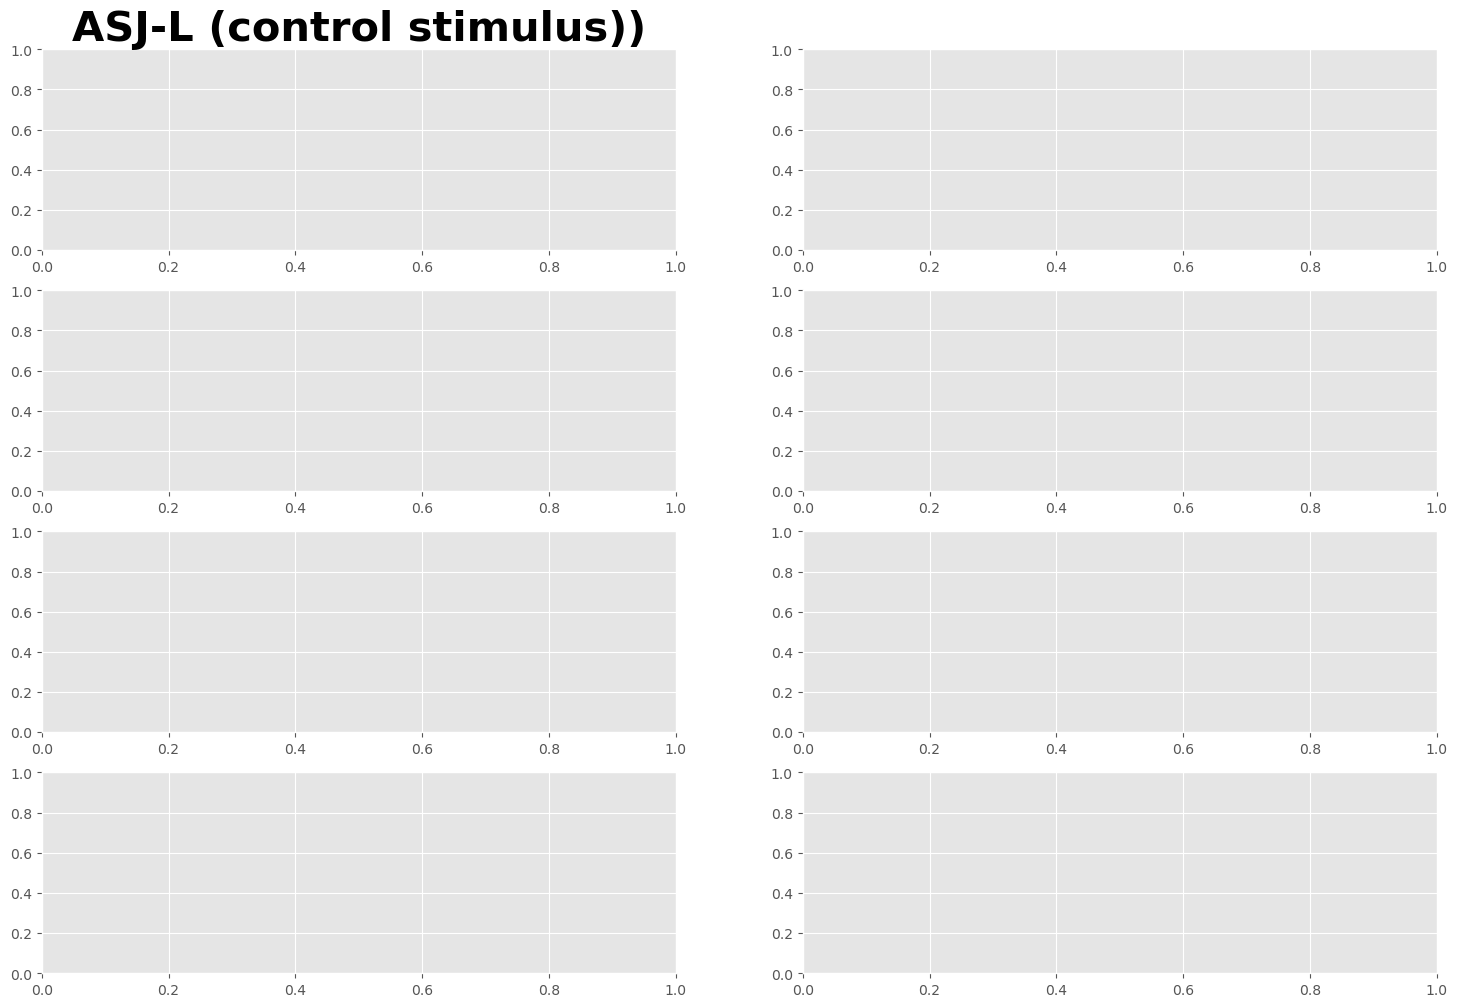

In [48]:
### Plotting top 10 ASJ-correlated neurons for each stimuli ###
    
plt.style.use("ggplot") #to have plot look more like ggplot2 in R
colors = sns.color_palette("Set3") #if you look up 'matplotlib colormap reference' you can find a list of options

fig, axs = plt.subplots(4,2, figsize=(18,12), facecolor='w') #this establishes the plotting
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]
ax5 = axs[2,0]
ax6 = axs[2,1]
ax7 = axs[3,0]
ax8 = axs[3,1]

ax1.set_title('ASJ-L (control stimulus))', fontsize=30, weight='bold') 
sns.boxplot(data=top10_rank_ASJ_L_corrC, palette=colors, linewidth = 5, ax=ax1) 
sns.swarmplot(data=top10_rank_ASJ_L_corrC, size=10, color='black', ax=ax1) 
plt.xticks(rotation=60) 
ax1.set_ylabel('Correlation', fontsize=12, weight='bold')
ax1.xaxis.set_tick_params(labelsize=10)
ax1.yaxis.set_tick_params(labelsize=8)
ax1.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5) 

ax2.set_title('ASJ-R (control stimulus)', fontsize=30, weight='bold') 
sns.boxplot(data=top10_rank_ASJ_R_corrC, palette=colors, linewidth = 5, ax=ax2) 
sns.swarmplot(data=top10_rank_ASJ_R_corrC, size=10, color='black', ax=ax2) 
plt.xticks(rotation=60) 
ax2.set_ylabel('Correlation', fontsize=12, weight='bold')
ax2.xaxis.set_tick_params(labelsize=10)
ax2.yaxis.set_tick_params(labelsize=8)
ax2.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5) 

ax3.set_title('ASJ-L (Butanone stimulus)', fontsize=30, weight='bold') 
sns.boxplot(data=top10_rank_ASJ_L_corrB, palette=colors, linewidth = 5, ax=ax3) 
sns.swarmplot(data=top10_rank_ASJ_L_corrB, size=10, color='black', ax=ax3) 
plt.xticks(rotation=60) 
ax3.set_ylabel('Correlation', fontsize=12, weight='bold')
ax3.xaxis.set_tick_params(labelsize=10)
ax3.yaxis.set_tick_params(labelsize=8)
ax3.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5) 

ax4.set_title('ASJ-R (Butanone stimulus)', fontsize=30, weight='bold') 
sns.boxplot(data=top10_rank_ASJ_R_corrB, palette=colors, linewidth = 5, ax=ax4) 
sns.swarmplot(data=top10_rank_ASJ_R_corrB, size=10, color='black', ax=ax4) 
plt.xticks(rotation=60) 
ax4.set_ylabel('Correlation', fontsize=12, weight='bold')
ax4.xaxis.set_tick_params(labelsize=10)
ax4.yaxis.set_tick_params(labelsize=8)
ax4.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5) 

ax5.set_title('ASJ-L (Pentanedoine stimulus)', fontsize=30, weight='bold') 
sns.boxplot(data=top10_rank_ASJ_L_corrP, palette=colors, linewidth = 5, ax=ax5) 
sns.swarmplot(data=top10_rank_ASJ_L_corrP, size=10, color='black', ax=ax5) 
plt.xticks(rotation=60) 
ax5.set_ylabel('Correlation', fontsize=12, weight='bold')
ax5.xaxis.set_tick_params(labelsize=10)
ax5.yaxis.set_tick_params(labelsize=8)
ax5.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5) 

ax6.set_title('ASJ-R (Pentanedoine stimulus)', fontsize=30, weight='bold') 
sns.boxplot(data=top10_rank_ASJ_R_corrP, palette=colors, linewidth = 5, ax=ax6) 
sns.swarmplot(data=top10_rank_ASJ_R_corrP, size=10, color='black', ax=ax6) 
plt.xticks(rotation=60) 
ax6.set_ylabel('Correlation', fontsize=12, weight='bold')
ax6.xaxis.set_tick_params(labelsize=10)
ax6.yaxis.set_tick_params(labelsize=8)
ax6.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5) 

ax7.set_title('ASJ-L (NaCl stimulus)', fontsize=30, weight='bold') 
sns.boxplot(data=top10_rank_ASJ_L_corrNaCl, palette=colors, linewidth = 5, ax=ax7) 
sns.swarmplot(data=top10_rank_ASJ_L_corrNaCl, size=10, color='black', ax=ax7)
plt.xticks(rotation=60) 
ax7.set_ylabel('Correlation', fontsize=12, weight='bold')
ax7.xaxis.set_tick_params(labelsize=10)
ax7.yaxis.set_tick_params(labelsize=8)
ax7.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5) 

ax8.set_title('ASJ-R (NaCl stimulus)', fontsize=30, weight='bold')
sns.boxplot(data=top10_rank_ASJ_R_corrNaCl, palette=colors, linewidth = 5, ax=ax8)
sns.swarmplot(data=top10_rank_ASJ_R_corrNaCl, size=10, color='black', ax=ax8)
plt.xticks(rotation=60)
ax8.set_ylabel('Correlation', fontsize=12, weight='bold')
ax8.xaxis.set_tick_params(labelsize=10)
ax8.yaxis.set_tick_params(labelsize=8)
ax8.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/ASJ_LR_CorrelationStimulus.png', dpi = 900)

plt.show()
